In [217]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)

# Plotting pretty figures and avoid blurry images
%config InlineBackend.figure_format = 'retina'
# Larger scale for plots in notebooks
sns.set_context('notebook')

In [218]:
sales = pd.read_csv('supermarket_sales - Sheet1.csv')

In [219]:
sales.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [220]:
sales['Date'] = pd.to_datetime(sales['Date'])
sales.set_index(sales['Date'],inplace=True)

So, each sales entry has some gender data. 

Lets compare sales across genders, for this we shall use a countplot

## Countplot

Countplots are used to show the counts of observations in each categorical bin using bars. It offers a quick way to display the frequency of each value.


Female - 501
Male - 499


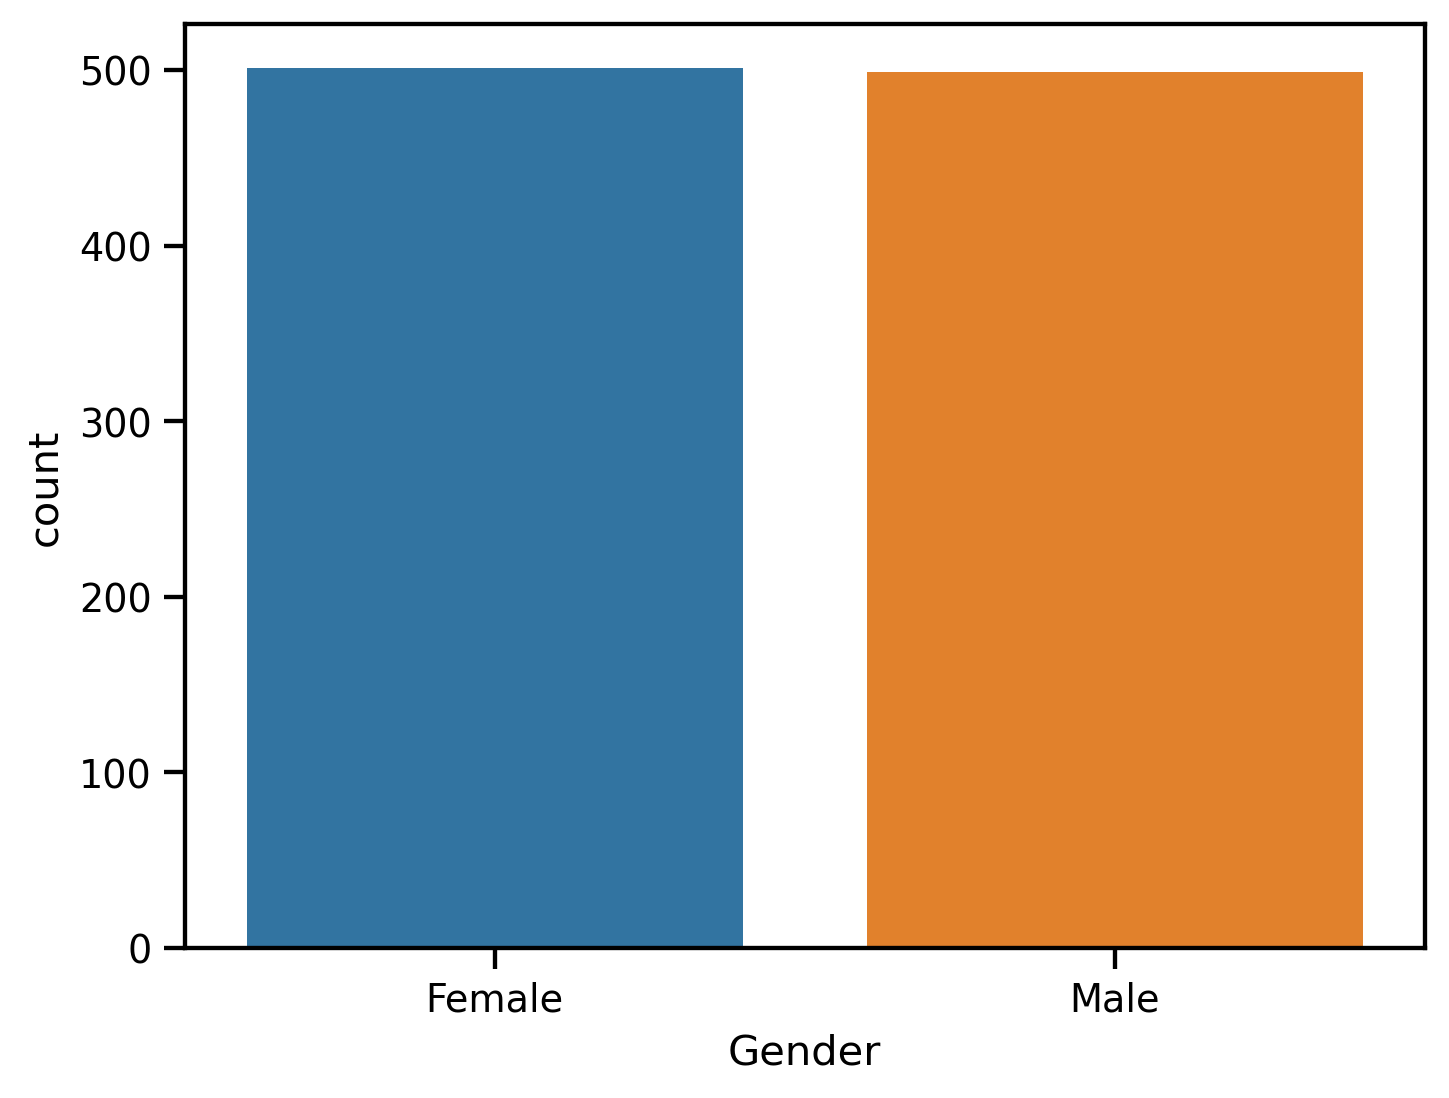

In [221]:
plt.figure(dpi = 125)
sns.countplot(sales['Gender'])

arr = sales.Gender.value_counts()
print(f"Female - {arr[0]}\nMale - {arr[1]}")

Lets now use countplots to search for,

- Busiest City
- Busiest Branch
- Most Common Payment Method

For this, we use a countplot,

Yangon - 340
Naypyitaw - 332
Mandalay = 328


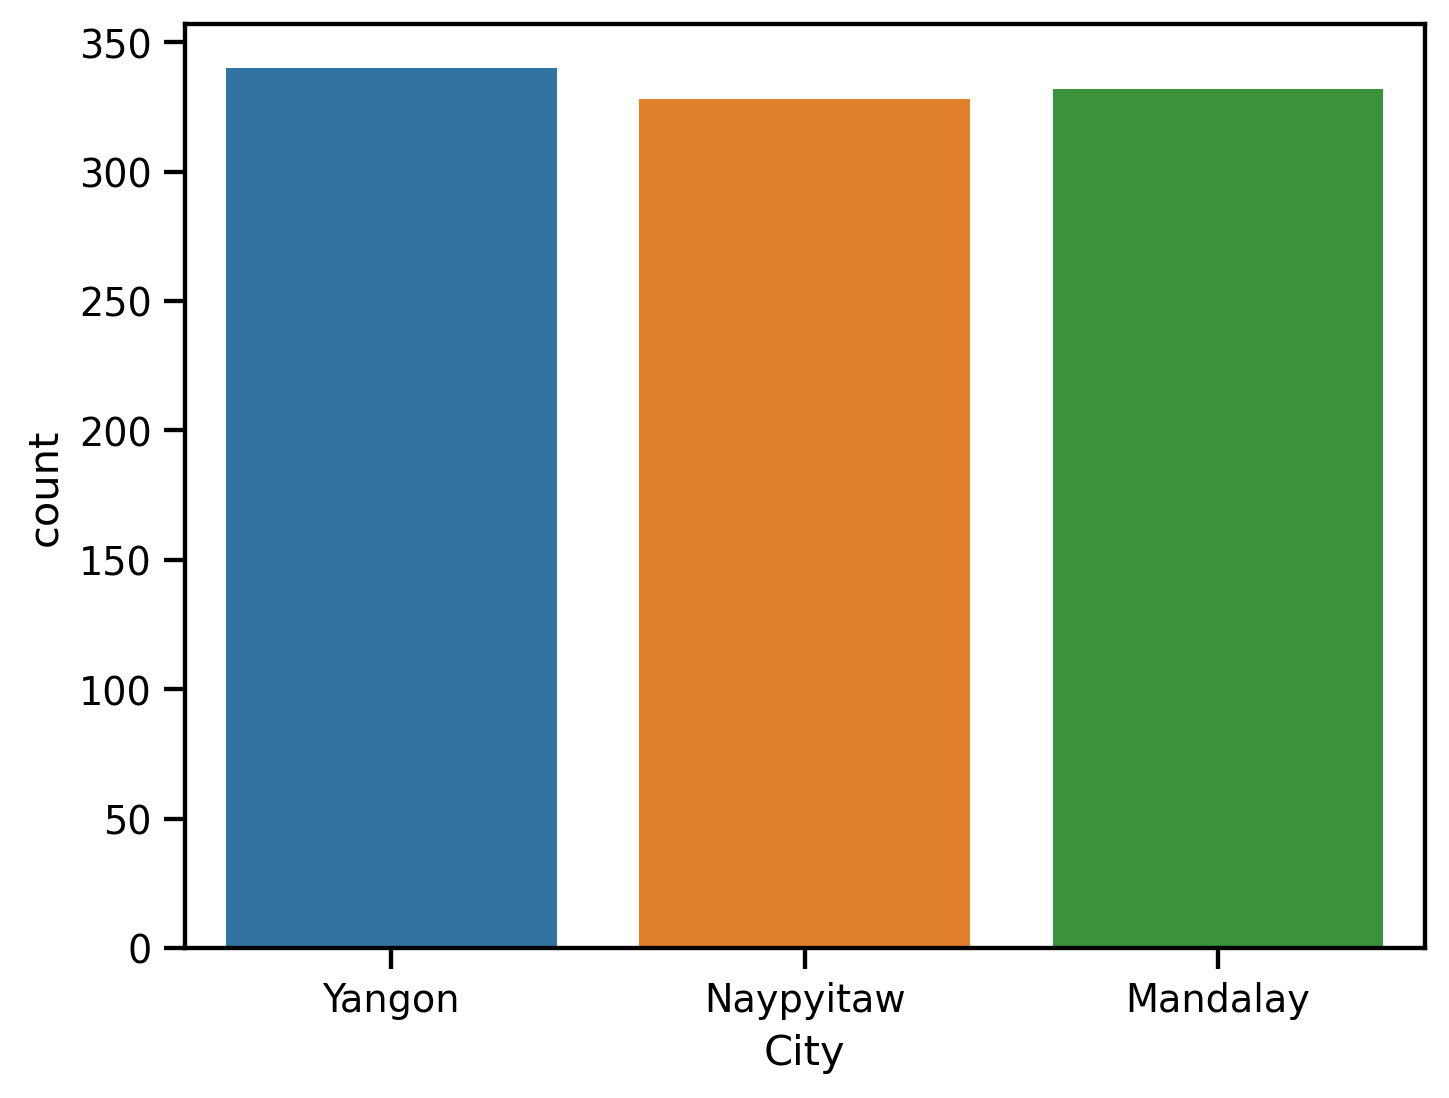

In [222]:
plt.figure(dpi = 125)
sns.countplot(sales['City'])

arr = sales.City.value_counts()
print(f"Yangon - {arr[0]}\nNaypyitaw - {arr[1]}\nMandalay = {arr[2]}")

A - 340
B - 332
C = 328


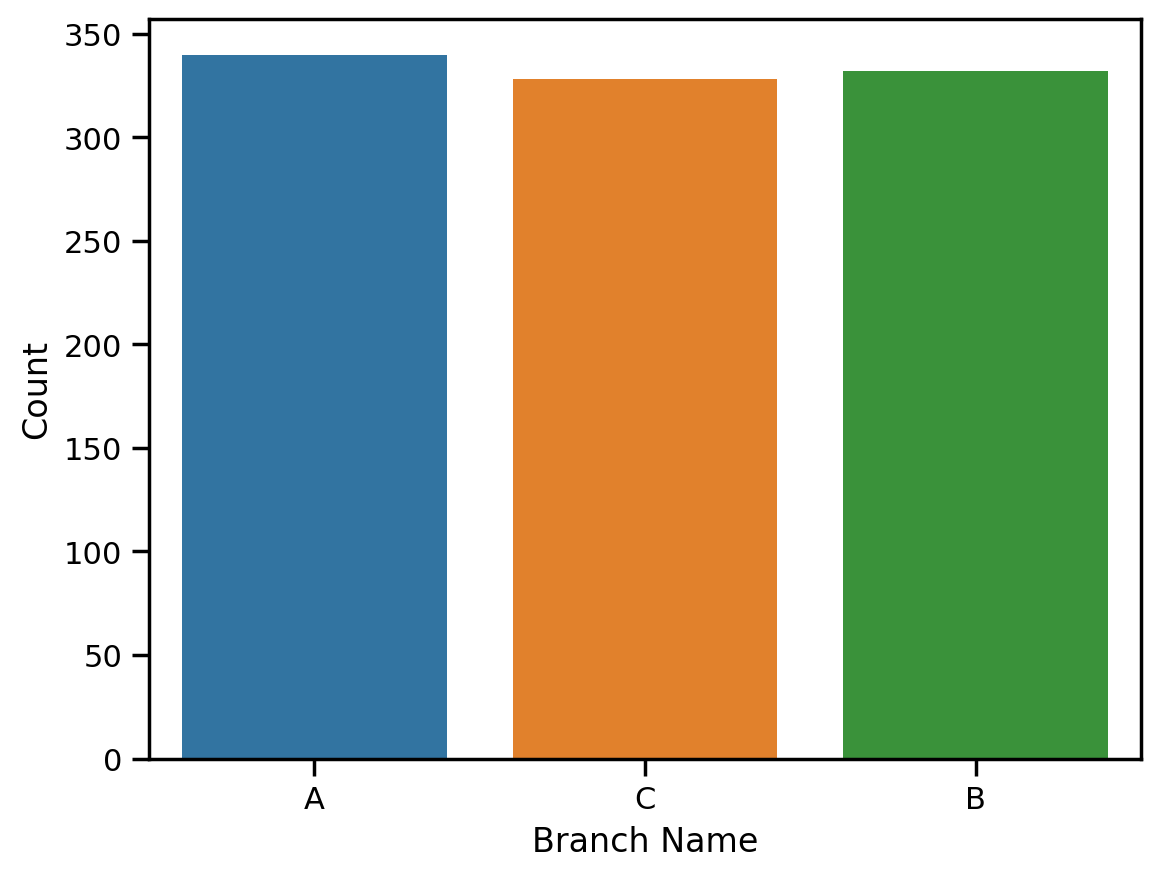

In [223]:
sns.countplot(sales['Branch'])
plt.xlabel('Branch Name')
plt.ylabel('Count')
A,B,C =sales.Branch.value_counts()

print(f"A - {A}\nB - {B}\nC = {C}")

plt.show()

Ewallet - 345
Cash - 344
CC = 311


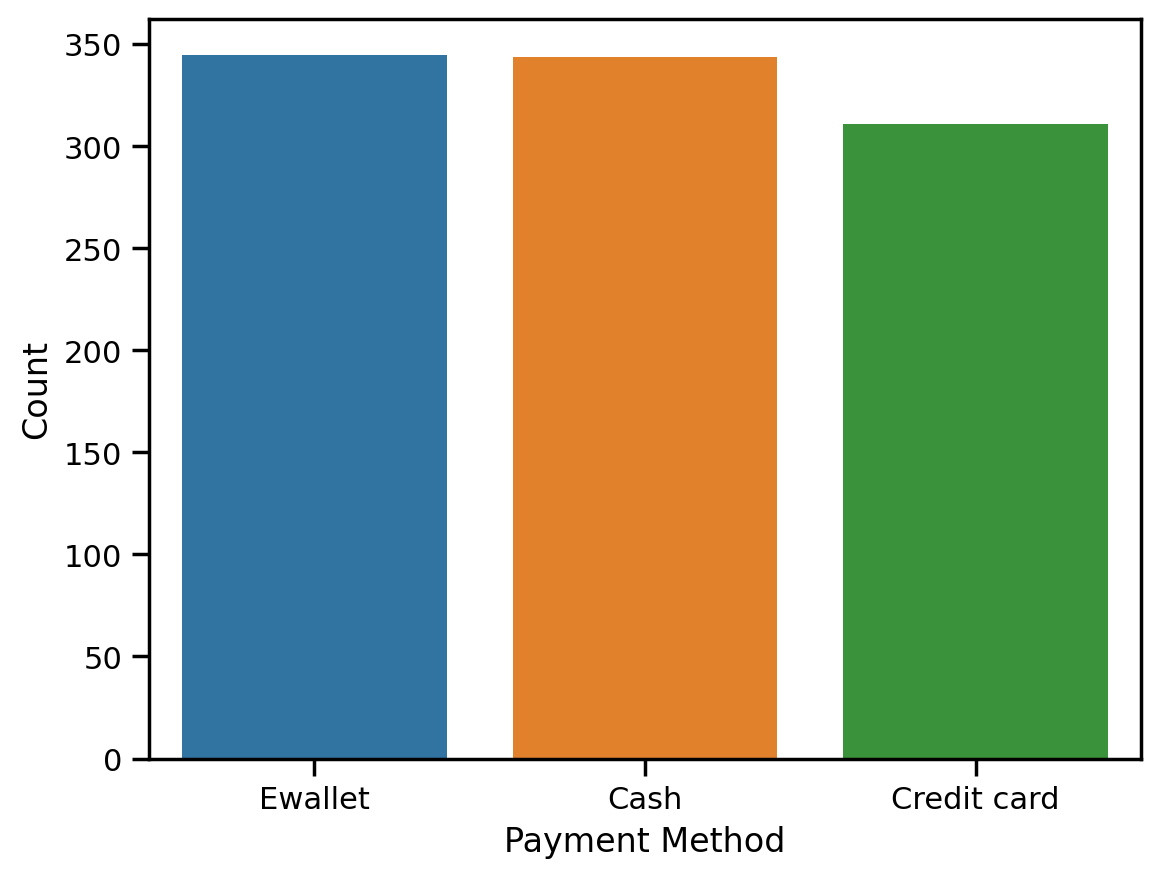

In [224]:
sns.countplot(sales['Payment'])
plt.xlabel('Payment Method')
plt.ylabel('Count')

ewallet,cash,cc = sales.Payment.value_counts()

print(f"Ewallet - {ewallet}\nCash - {cash}\nCC = {cc}")

Lets find out which payment method is used more often at a 
- Particular City 
- Branch 
- For which Product Type.

We still use countplots here, by setting a y axis and a hue by which the data will be represented

<AxesSubplot:xlabel='count', ylabel='City'>

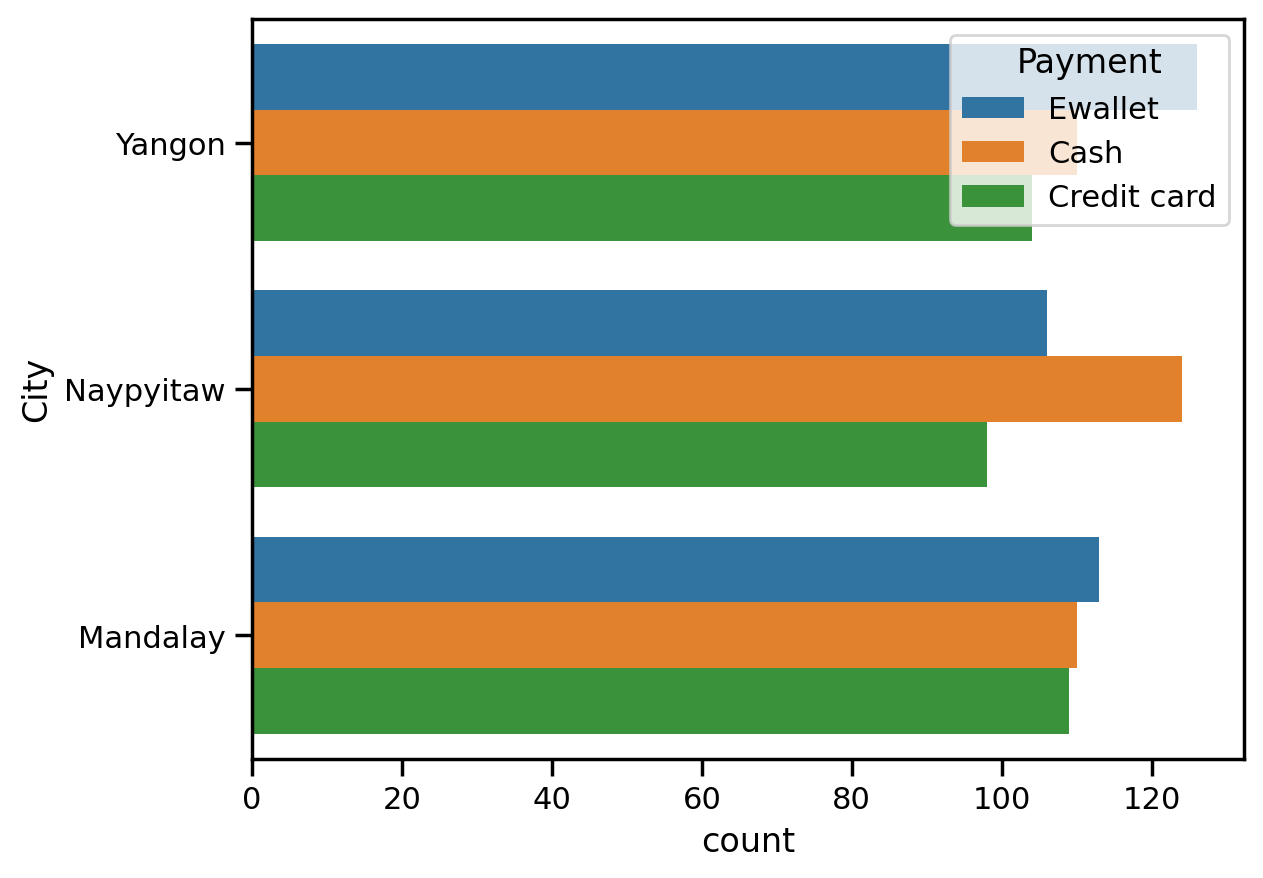

In [225]:
sns.countplot(y = 'City' , hue = 'Payment' , data = sales)

<AxesSubplot:xlabel='count', ylabel='Branch'>

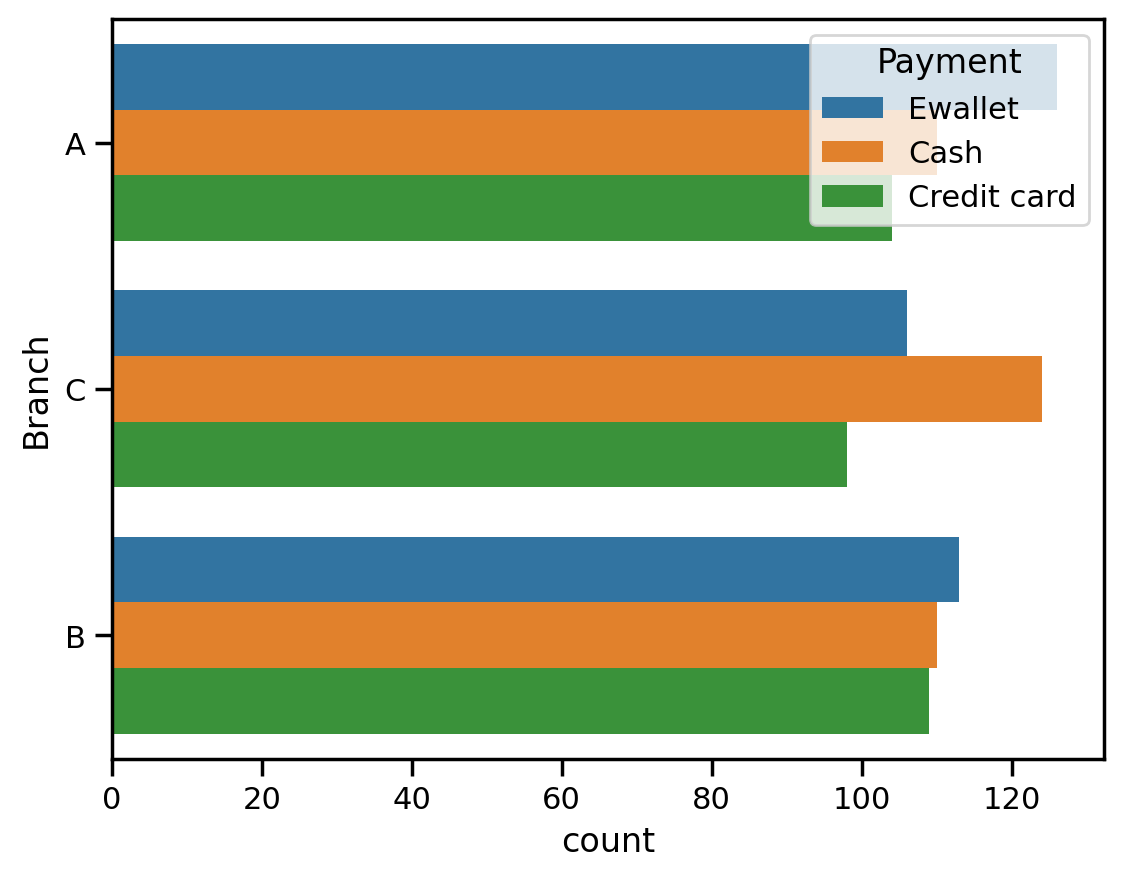

In [226]:
sns.countplot(y = 'Branch' , hue = 'Payment' , data = sales)

<AxesSubplot:xlabel='count', ylabel='Product line'>

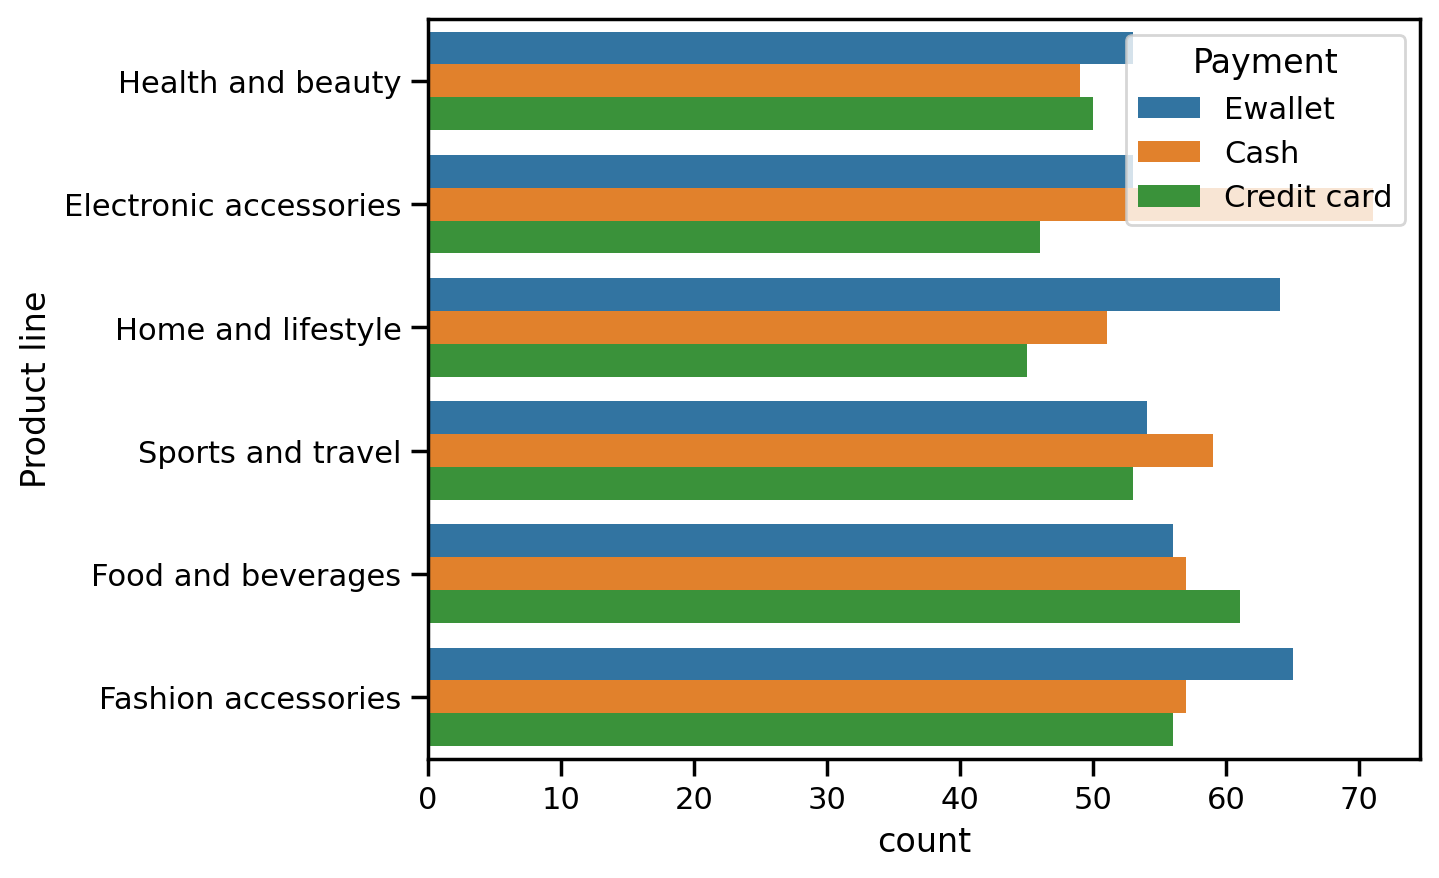

In [227]:
sns.countplot(y = 'Product line' , hue = 'Payment' , data = sales)

While we're at it, lets compare the sales of product types across cities. 

Notice how the product type goes on the y-axis here, this is as we want to find out which product is selling the most in a city.

<AxesSubplot:xlabel='count', ylabel='Product line'>

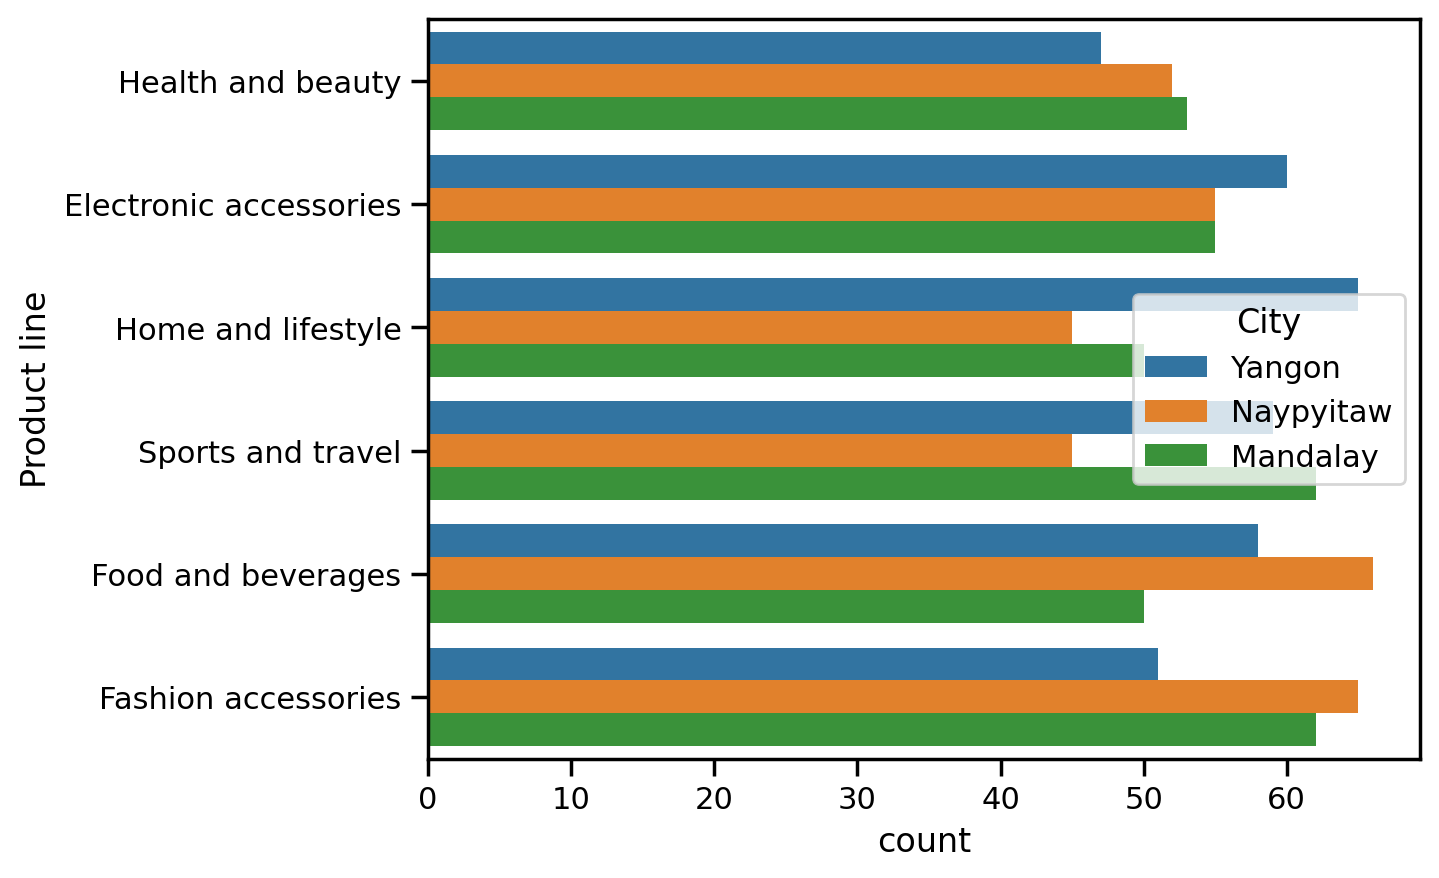

In [228]:
sns.countplot(y = 'Product line' , hue = 'City' , data = sales)

Comparing the sales of product types across branches.

<AxesSubplot:xlabel='count', ylabel='Product line'>

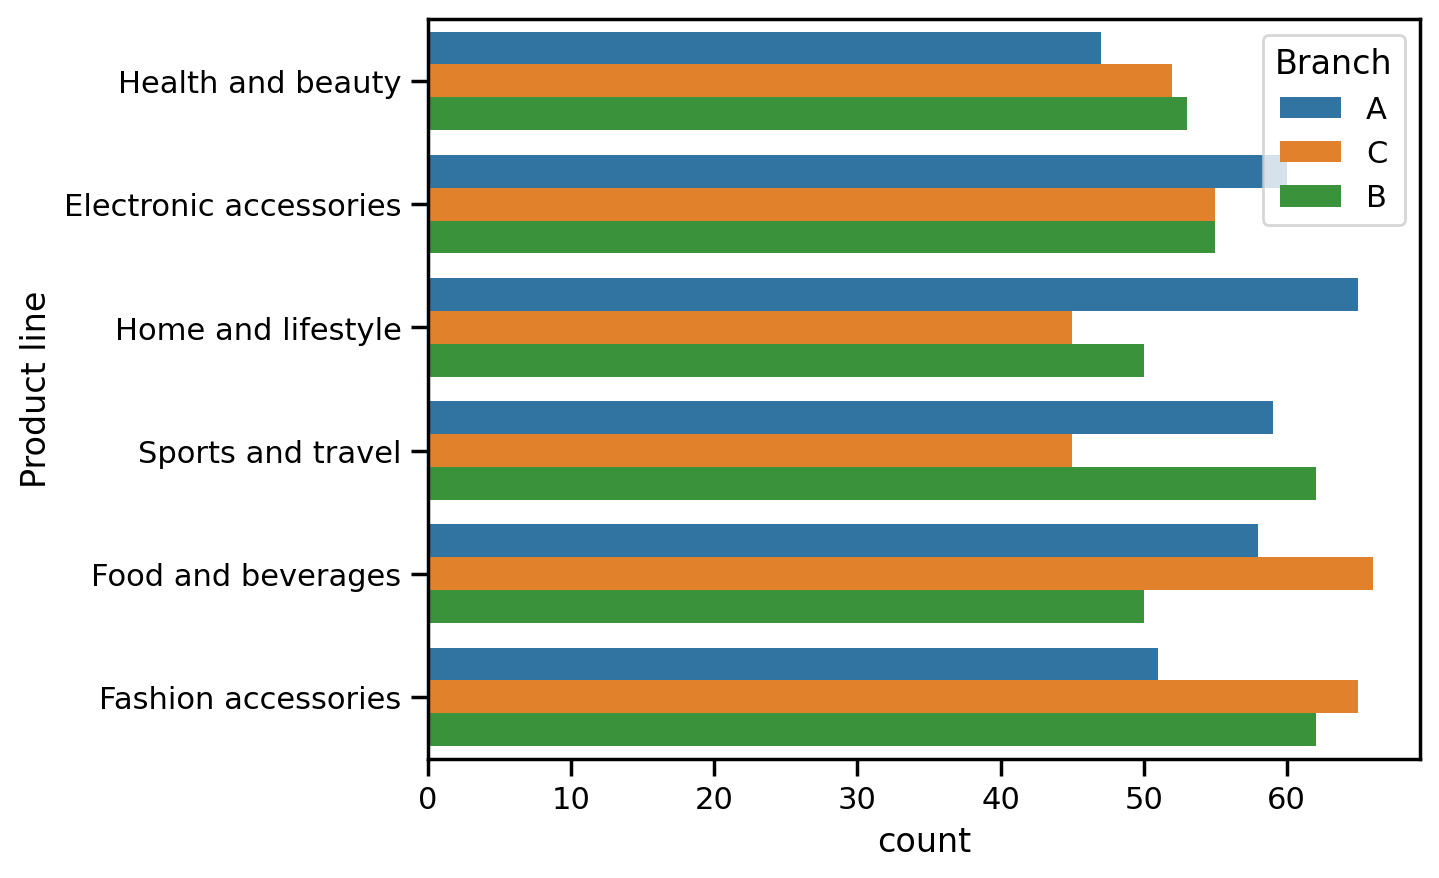

In [229]:
sns.countplot(y = 'Product line' , hue = 'Branch' , data = sales)

Comparing product line with gender

<AxesSubplot:xlabel='count', ylabel='Product line'>

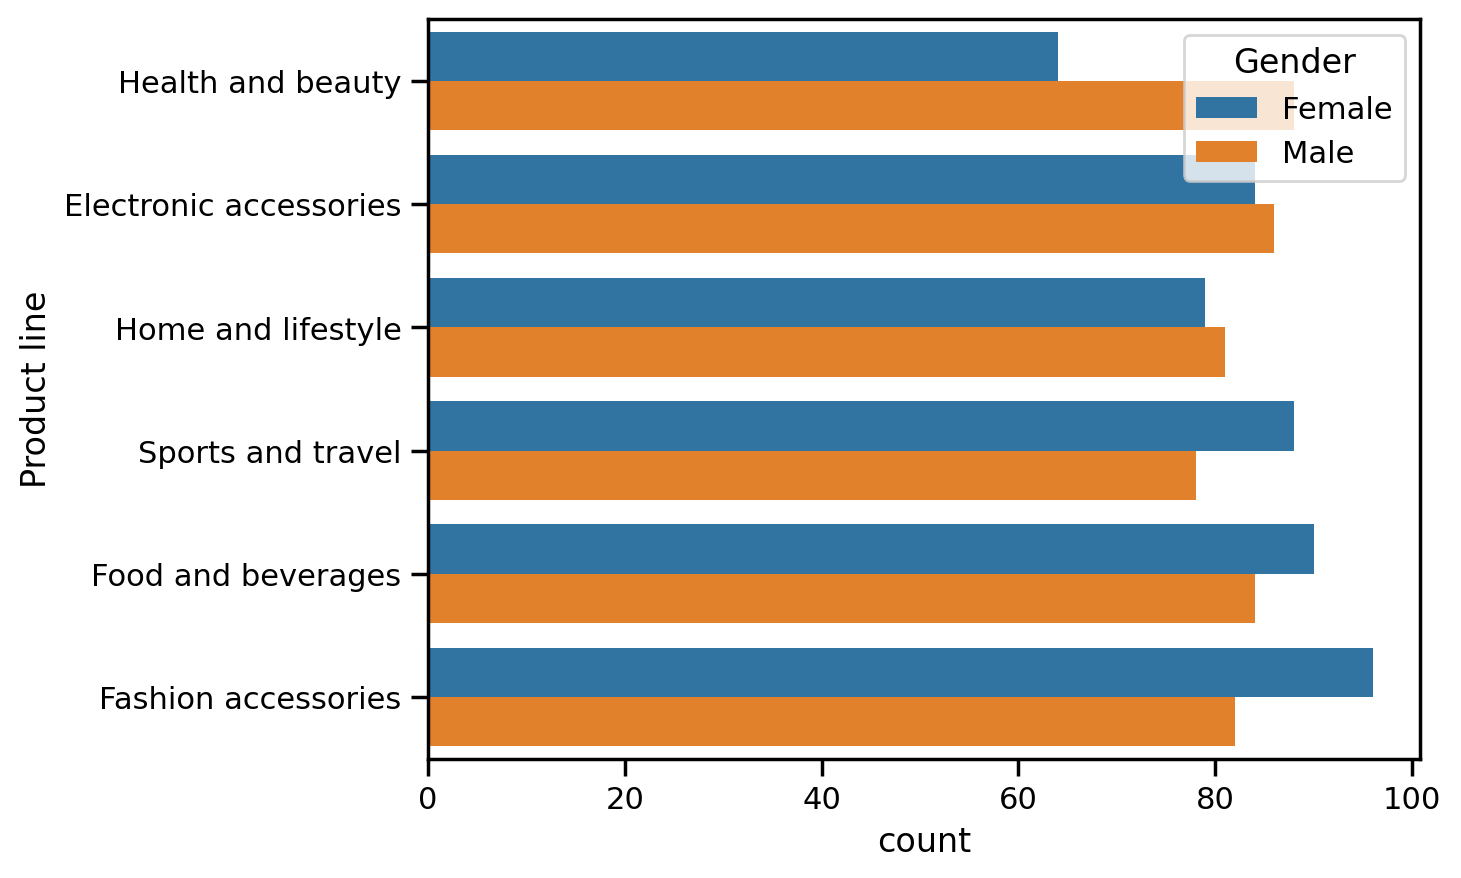

In [230]:
sns.countplot(y = 'Product line' , hue = 'Gender' , data = sales)

Lets figure out which product line earns the most income and has the best rating

We shall use Barplots

## Barplots

Barplots represent numeric values for a variable with a height. The error associated is represented with error bars.
The height or length of the bars represents the value of the data. The value corresponds to levels on the y-axis.

Barplots are usually used to compare different variables and represent them visually.


<AxesSubplot:xlabel='Product line', ylabel='gross income'>

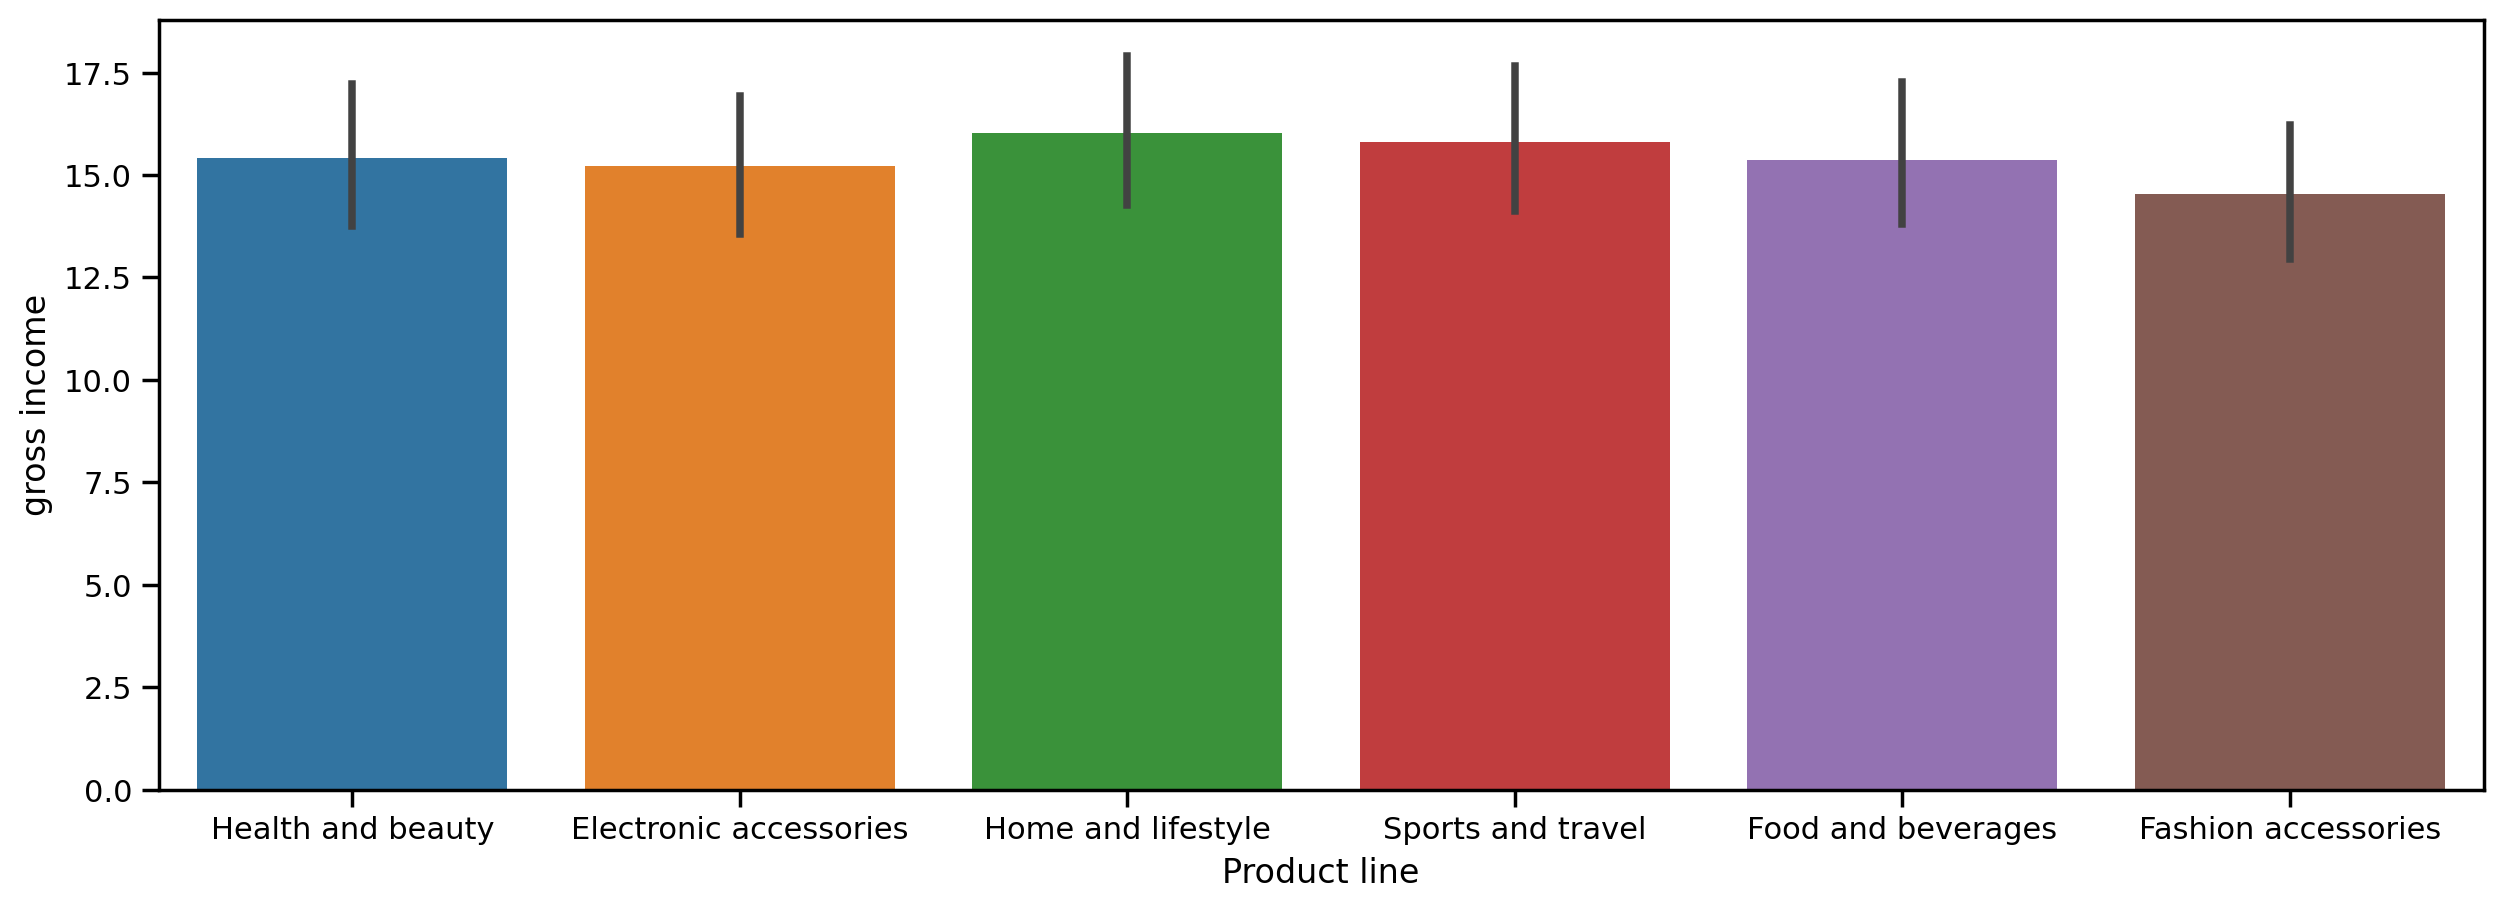

In [231]:
plt.figure(figsize=(15,5))
sns.barplot(x='Product line', y='gross income', data=sales)

Its a bit hard to identify the product line with most income, lets sort this dataset and then plot it again

In [232]:
pdtline = sales[["Product line", "gross income", "Rating"]].groupby(['Product line'], as_index=False)
pdtline_income = pdtline.sum().sort_values(by = 'gross income' , ascending = False)

Plotting the sorted dataframe

             Product line  gross income  Rating
2      Food and beverages     2673.5640  1237.7
5       Sports and travel     2624.8965  1148.1
0  Electronic accessories     2587.5015  1177.2
1     Fashion accessories     2585.9950  1251.2
4      Home and lifestyle     2564.8530  1094.0
3       Health and beauty     2342.5590  1064.5


<AxesSubplot:xlabel='Product line', ylabel='gross income'>

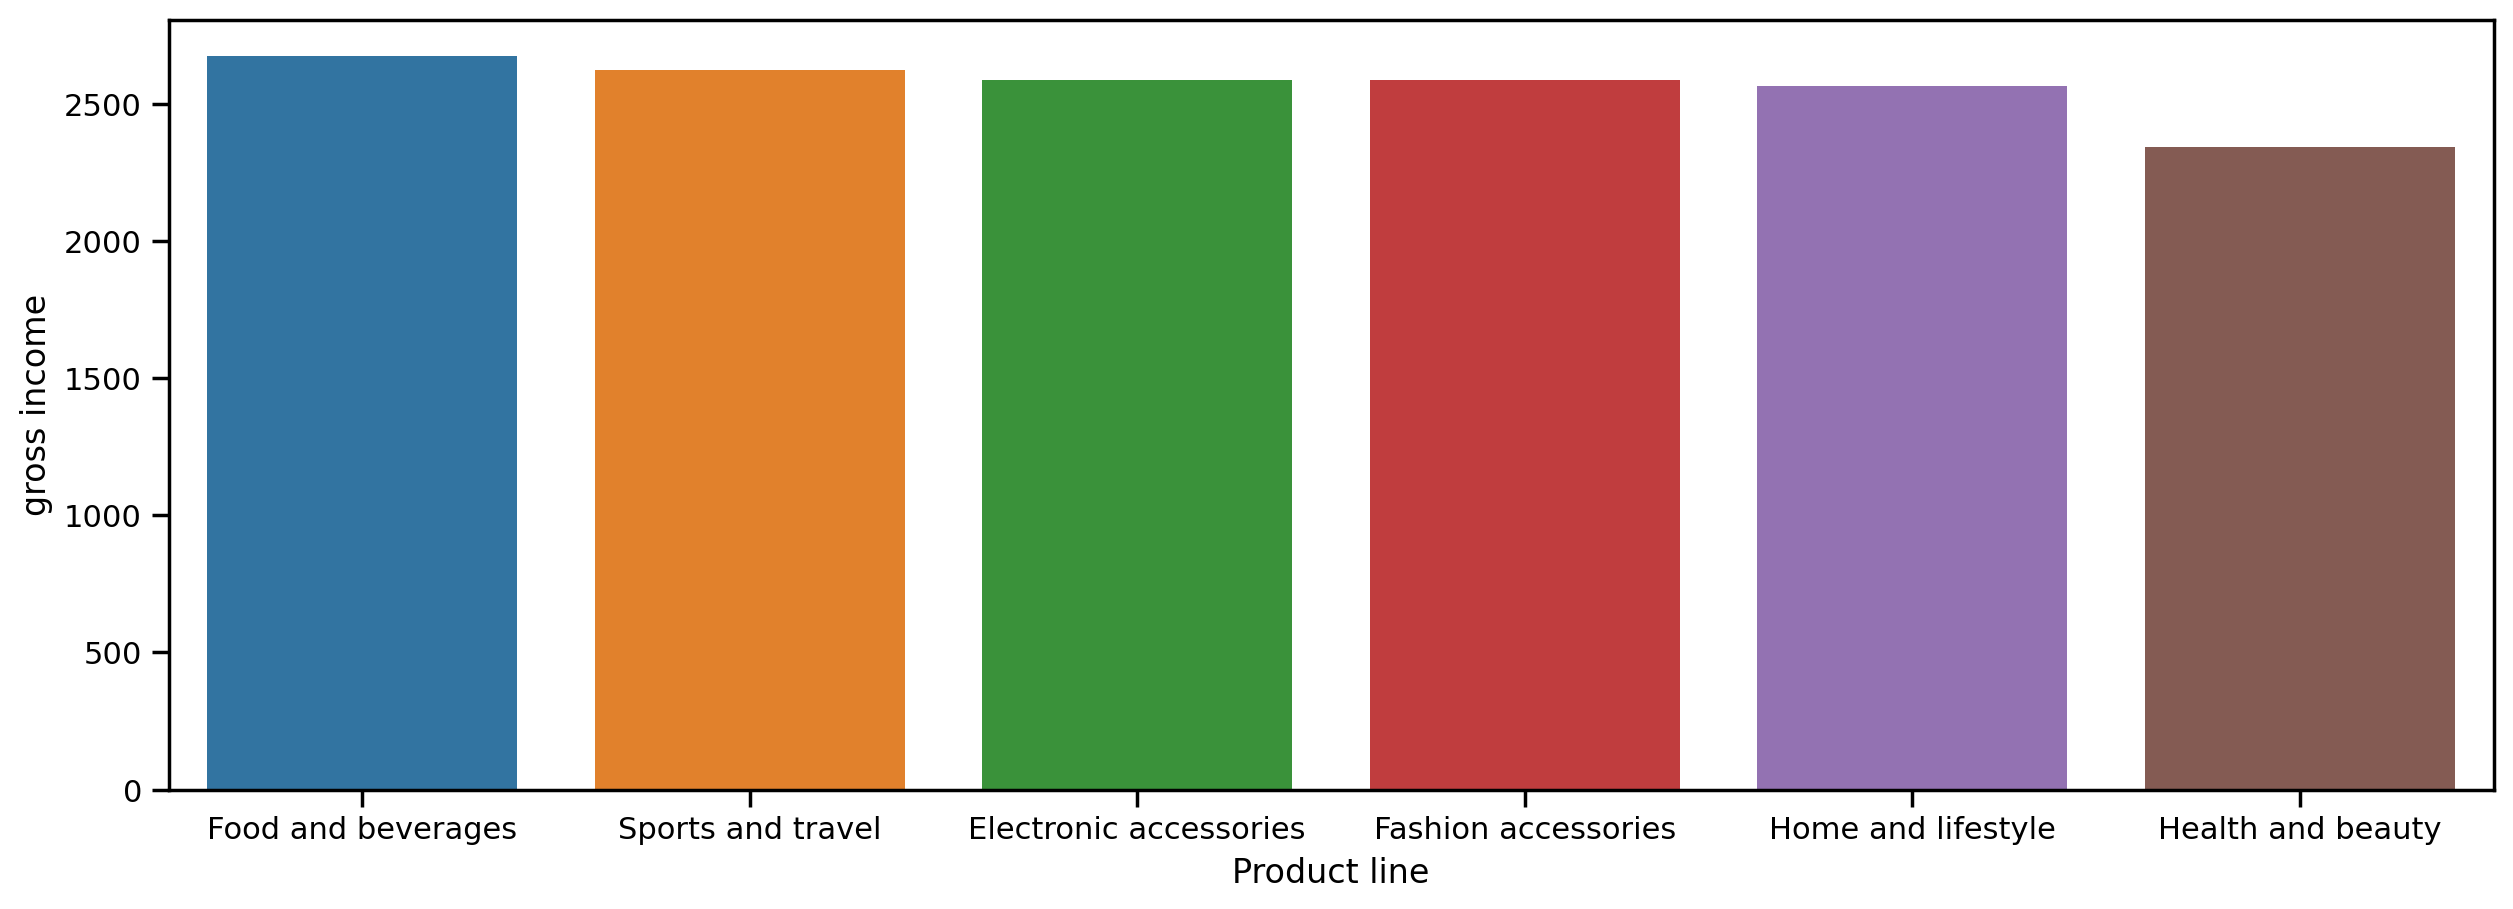

In [233]:
print(pdtline_income)
plt.figure(figsize=(15,5))
sns.barplot(data = pdtline_income , x = 'Product line' , y = 'gross income')

Performing the same operations for product line and rating

Notice how we are finding the mean here for the rating, summing it up is redundant in this case.

<AxesSubplot:xlabel='Product line', ylabel='Rating'>

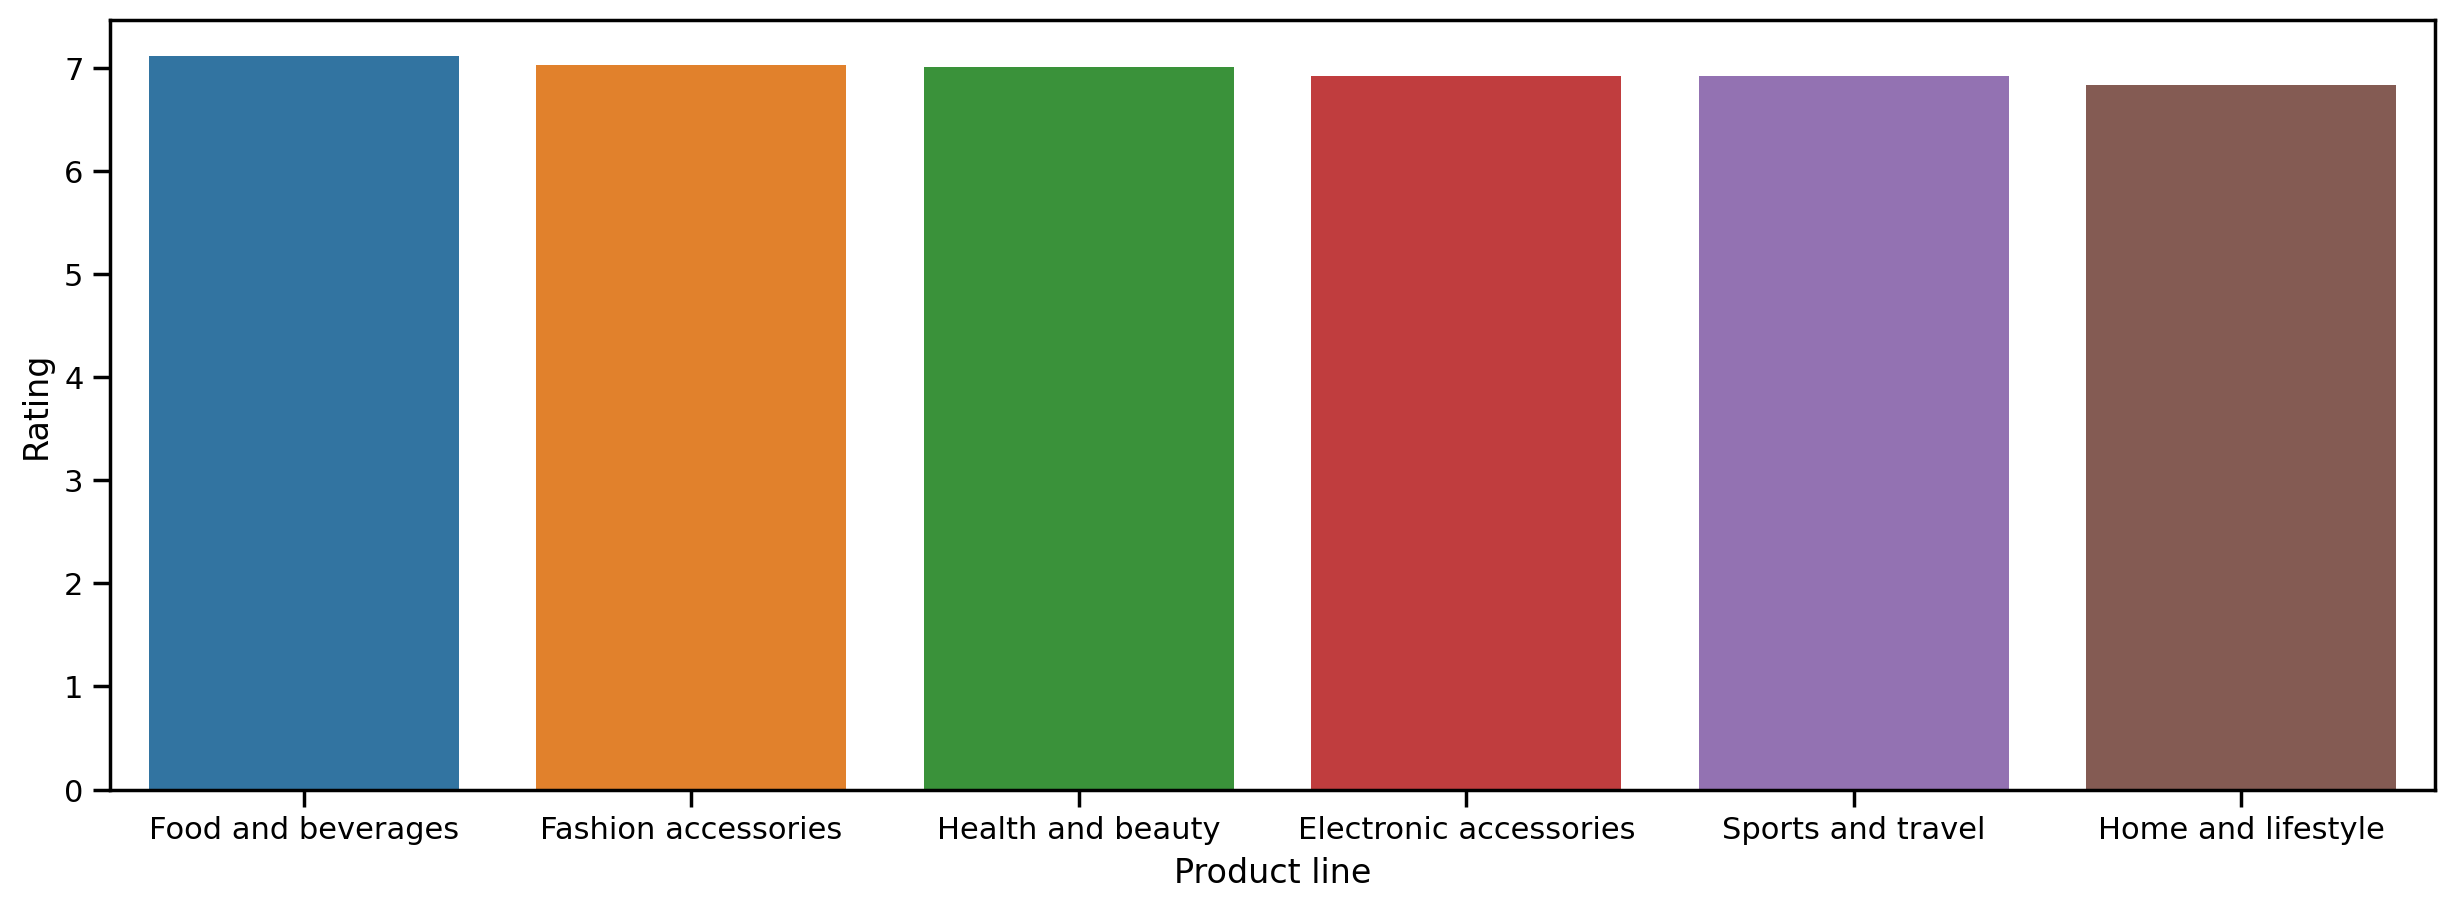

In [234]:
pdtline_rating = pdtline.mean().sort_values(by = 'Rating' , ascending = False)
plt.figure(figsize = (15,5))
sns.barplot(data = pdtline_rating , x = 'Product line' , y = 'Rating')

Comparing Ratings by Branch,

<AxesSubplot:xlabel='Branch', ylabel='Rating'>

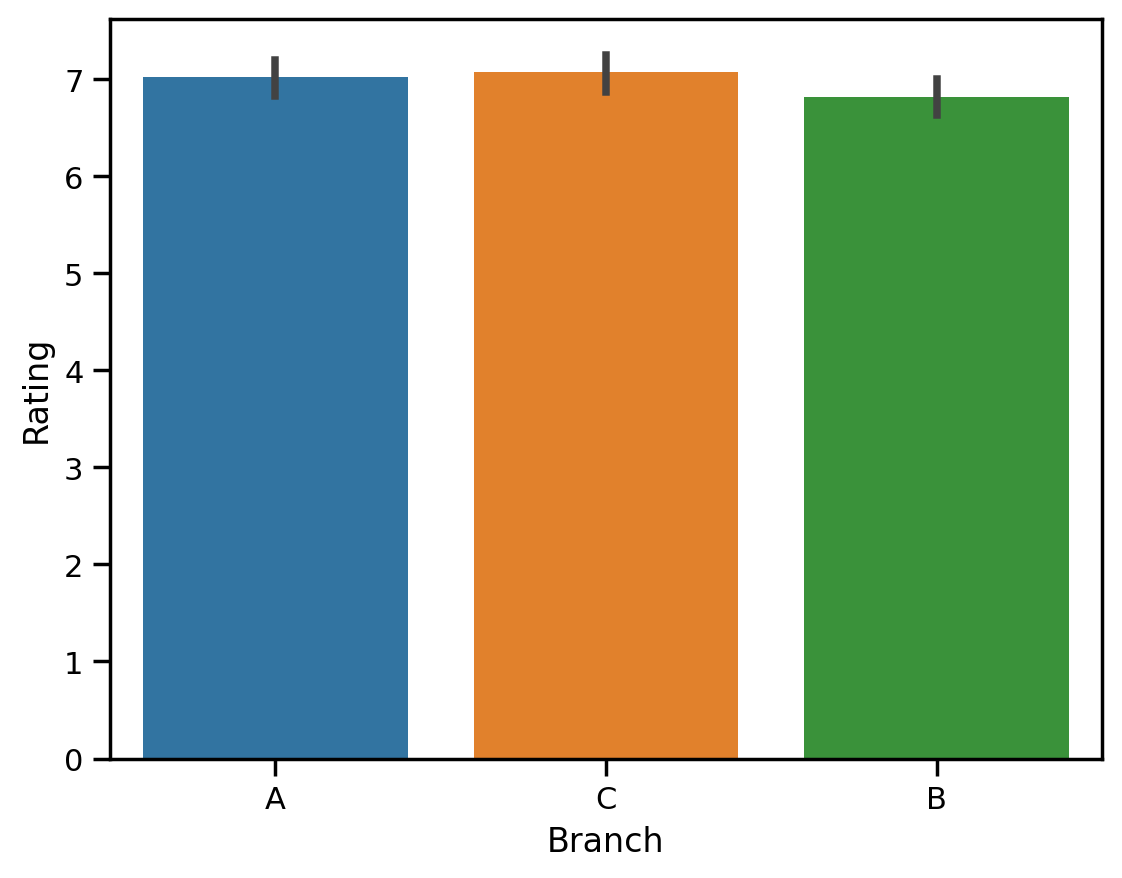

In [235]:
sns.barplot(x = 'Branch' , y = 'Rating' , data = sales)

To get better insights and quartile values, using boxpots will be better

## Boxplots

Boxplots compare variables across the levels of another categorical variable. 
Every boxplot has a five-number summary. These "five numbers" include,

- Minimum
- First Quartile
- Second Quartile [Median]
- Third Quartile
- Maximum

The quartiles are contained in the boxes, whereas the whiskers extend to the minimum and the maximum.

Boxplots are used to show distributions of numeric data values, especially when we want to compare them between multiple groups. 



<AxesSubplot:xlabel='Branch', ylabel='Rating'>

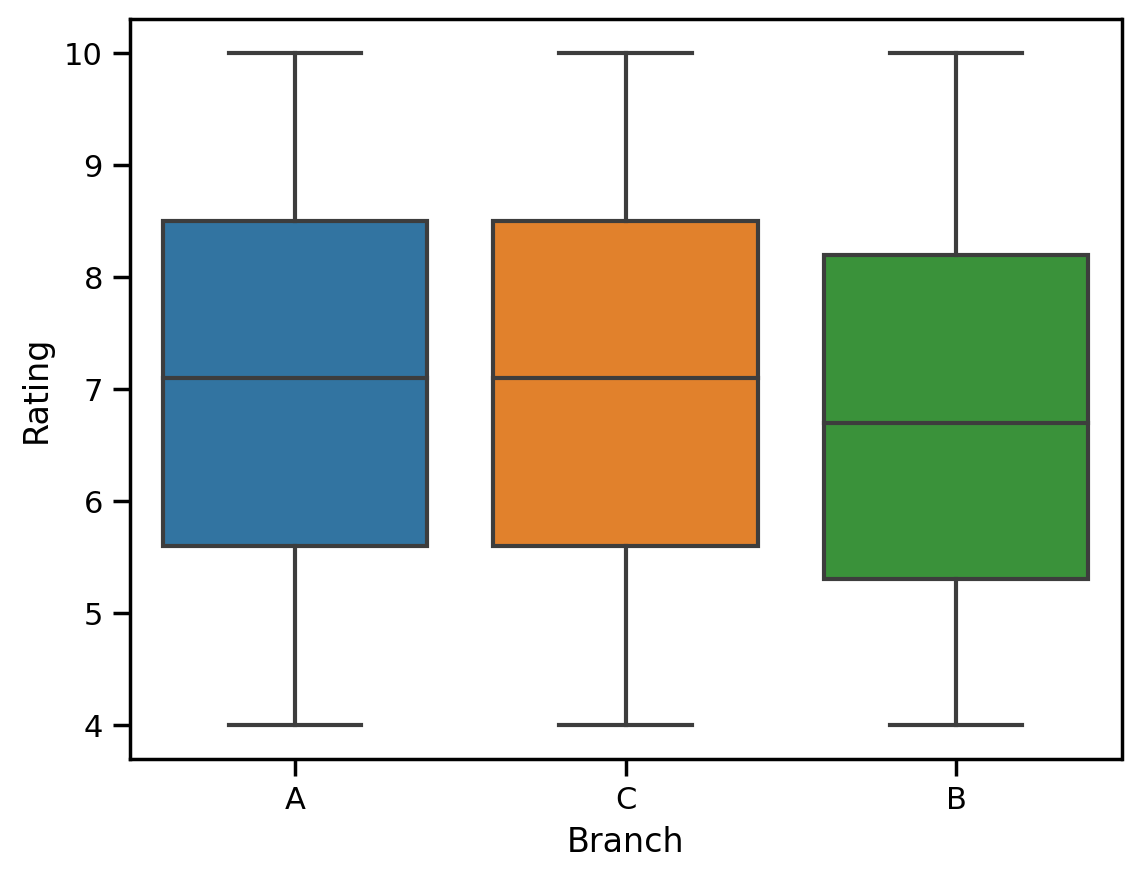

In [236]:
sns.boxplot(x = 'Branch' , y = 'Rating' , data = sales)

<AxesSubplot:xlabel='Quantity', ylabel='Product line'>

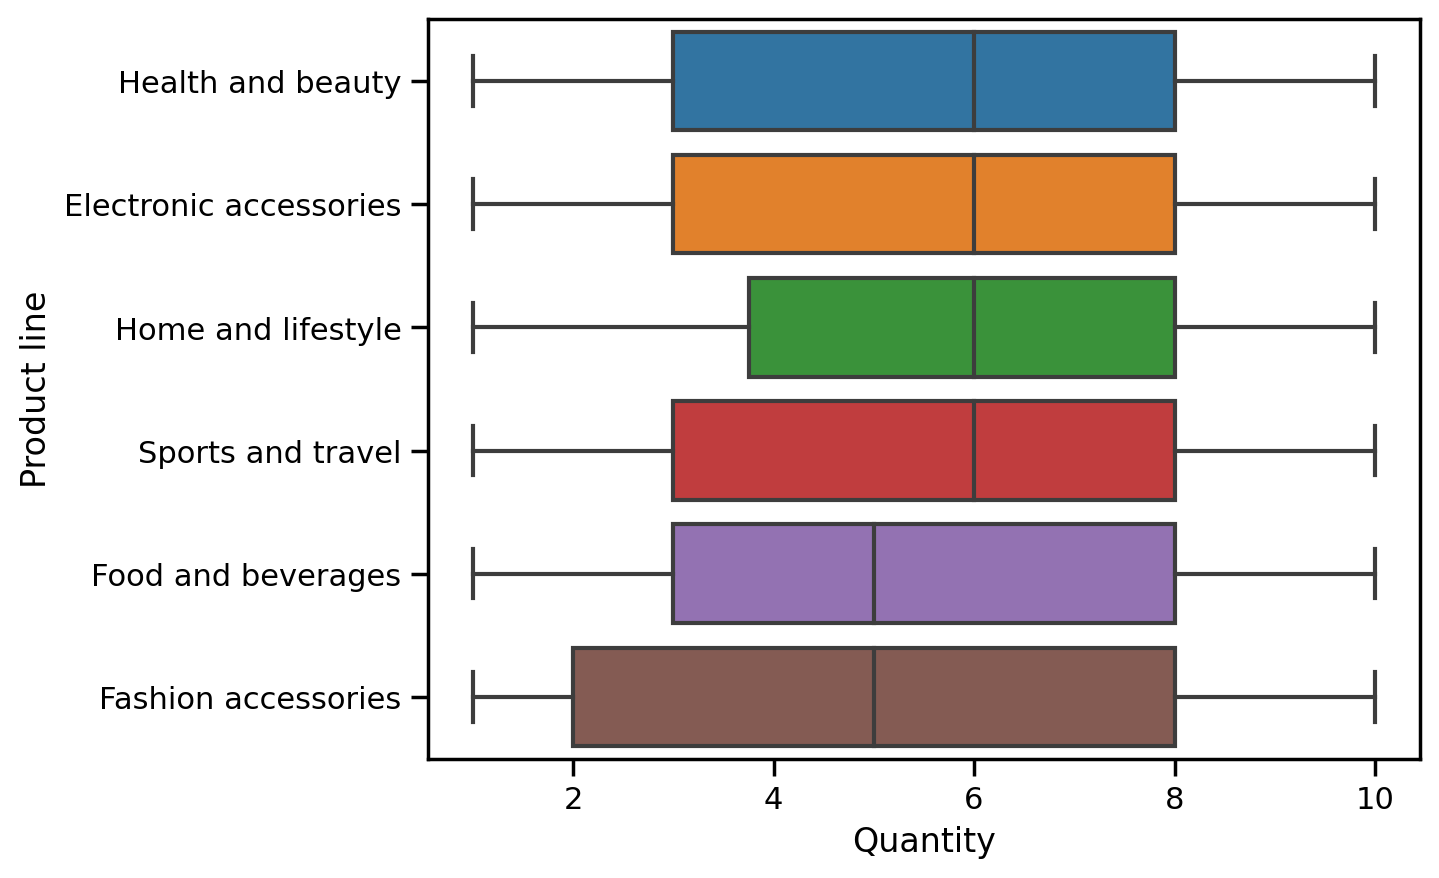

In [237]:
sns.boxplot( y = 'Product line' , x = 'Quantity' , data = sales)

## Stripplot

A strip plot is a single-axis scatter plot that is used to visualize the distribution of many individual one-dimensional values. It is typically used for small data sets (histograms and density plots are typically preferred for larger data sets). Stipplots are usually drawn as complements to boxplots. One issue with stripplots is that some data points may overlap.


<AxesSubplot:xlabel='Total', ylabel='Product line'>

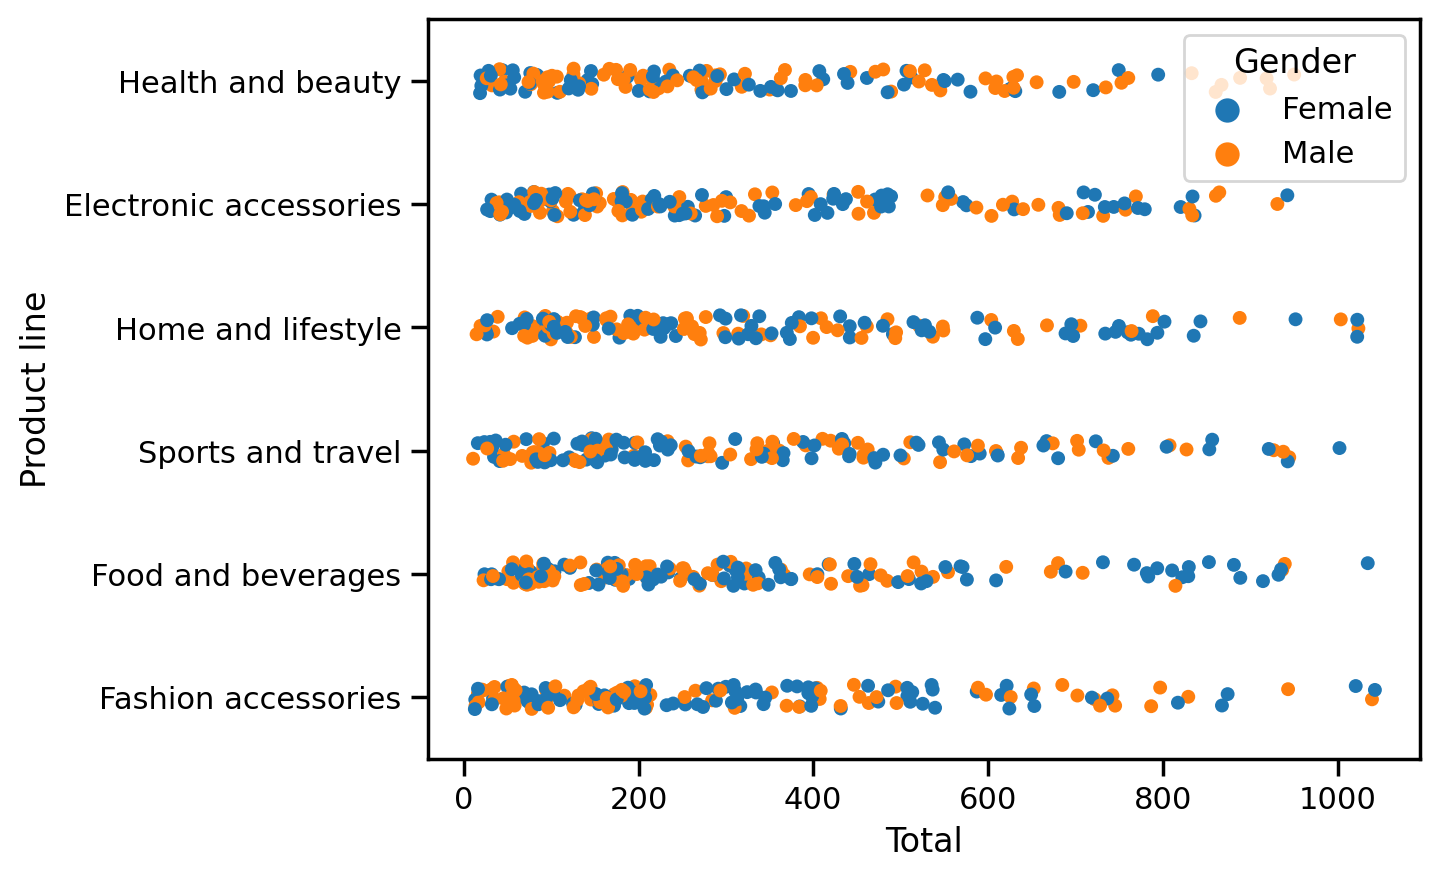

In [238]:
sns.stripplot(y = 'Product line', x = 'Total', hue = 'Gender', data=sales) 

Boxplots only show us 3 quartile values, to visualize a lot more quartile values, we use boxenplots.

## Boxenplot

Boxenplots are very similar to Boxplots. They represent more quartile values. We prefer Boxenplots to Boxplots when there are more outlier values present. This plot style was initially named a "letter value" plot because it shows a large number of quantiles defined as "letter values".


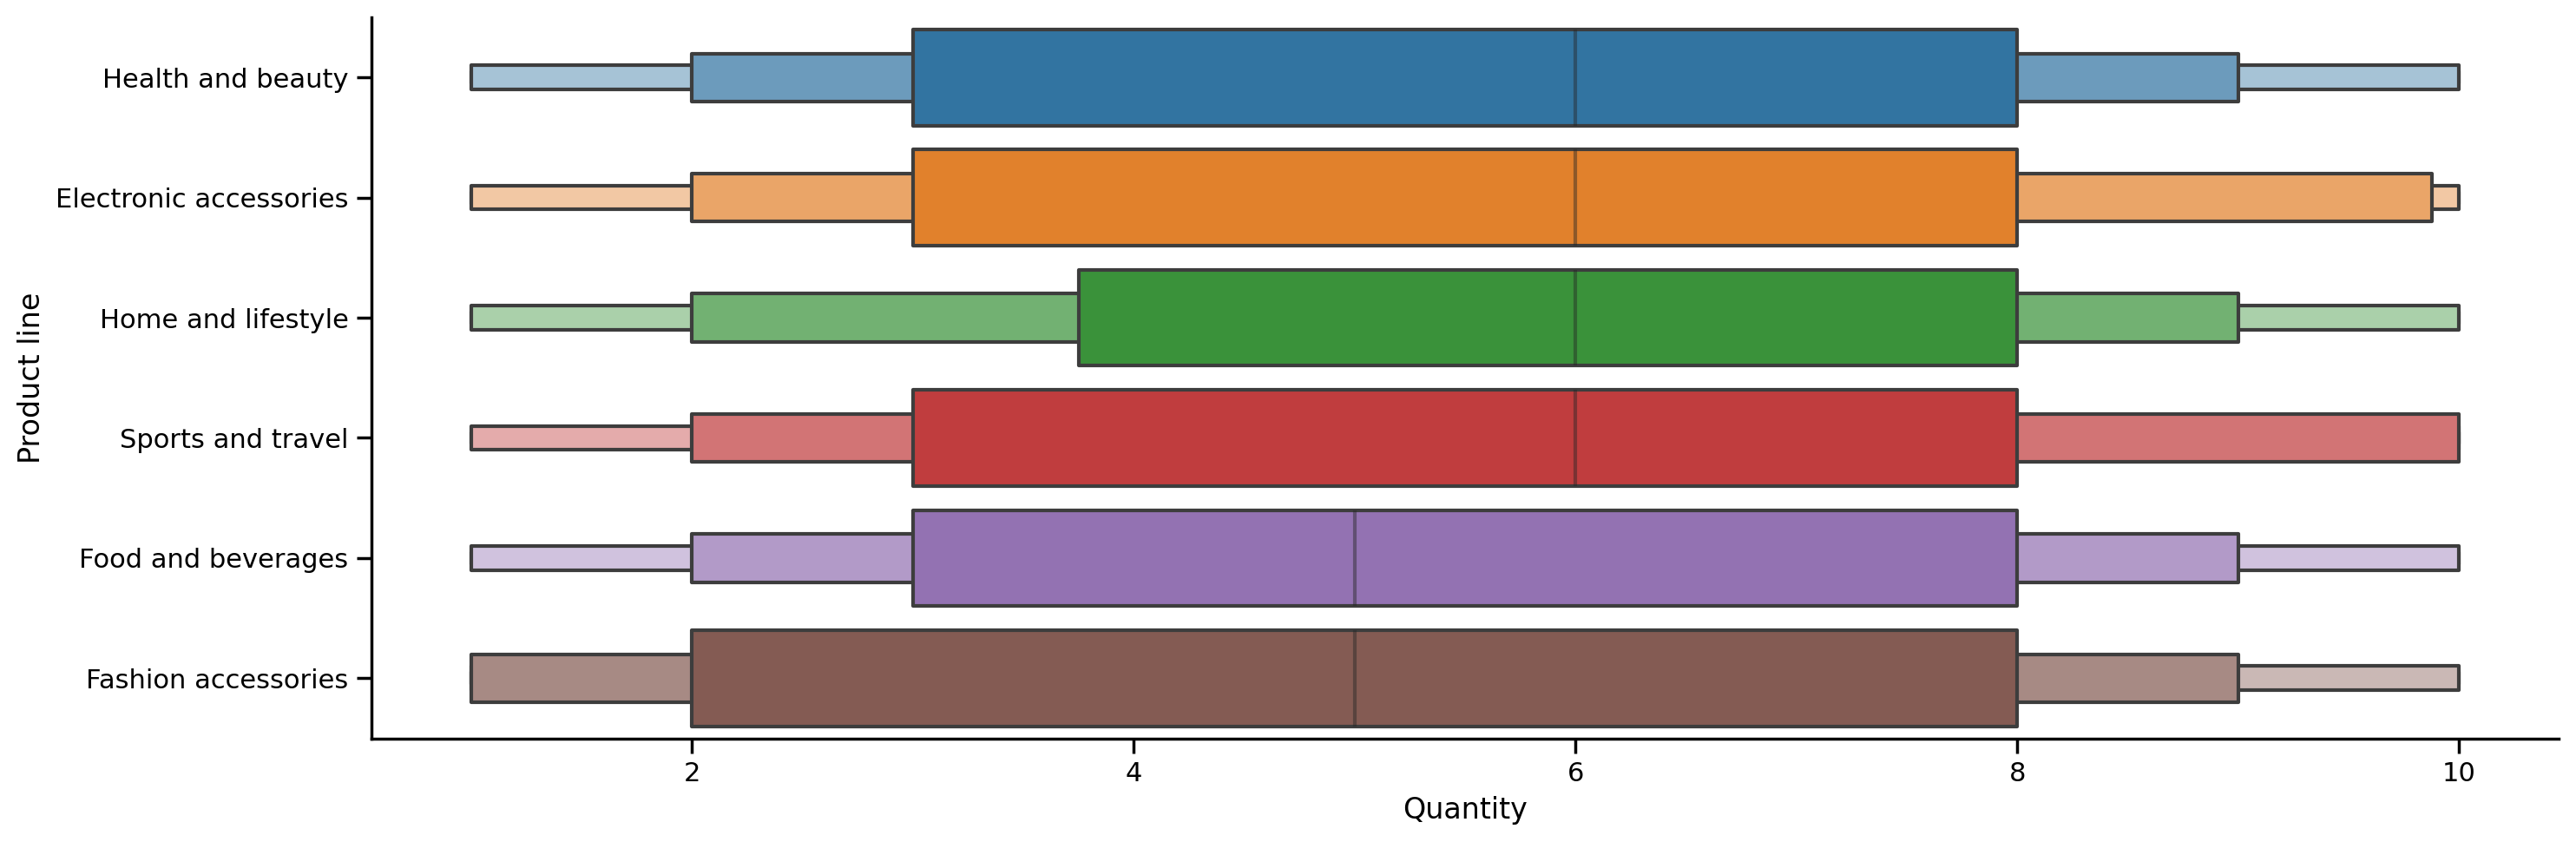

In [239]:
sns.catplot(y ='Product line', x ='Quantity' ,data = sales,kind='boxen',aspect=3) 

Lets visualize different kinds of customer rating across cities using swamplots. 

## Swarmplot

Swarmplots are used to draw a categorical scatterplot with non-overlapping points. The data points are adjusted along the categorical axis. This gives a better representation of the distribution of values. Still, it does not scale well to large numbers of observations. This style of the plot is sometimes called "beeswarm".


<AxesSubplot:xlabel='Customer type', ylabel='Rating'>

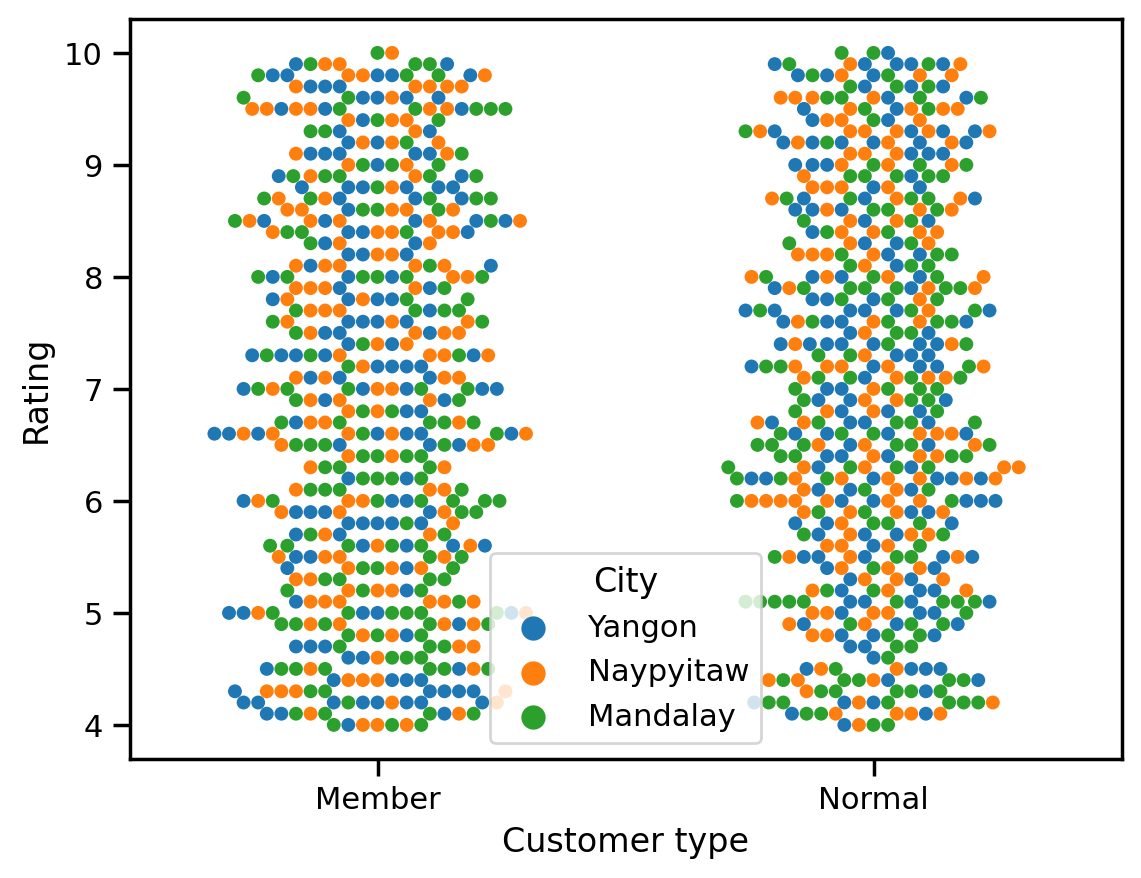

In [240]:
 sns.swarmplot(x="Customer type",  y = "Rating",  hue = "City", data =sales)

To find relations between different variables, we need to see if they're correlated.

In [241]:
np.round(sales.corr(),2)

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
Unit price,1.00,0.01,0.63,0.63,0.63,NaN,0.63,-0.01
Quantity,0.01,1.00,0.71,0.71,0.71,NaN,0.71,-0.02
Tax 5%,0.63,0.71,1.00,1.00,1.00,NaN,1.00,-0.04
Total,0.63,0.71,1.00,1.00,1.00,NaN,1.00,-0.04
cogs,0.63,0.71,1.00,1.00,1.00,NaN,1.00,-0.04
gross margin percentage,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gross income,0.63,0.71,1.00,1.00,1.00,NaN,1.00,-0.04
Rating,-0.01,-0.02,-0.04,-0.04,-0.04,NaN,-0.04,1.00


Lets color this table to visualize the correlation more effectively, using heatmaps.

# Heatmaps

Heatmaps are a method of representing data graphically where values are depicted by color, making it easy to visualize complex data, and understand it at a glance. A heat map represents the strength of correlation among variables. They can be used to identify variables that are highly correlated, and to get better predictions from machine learning models.


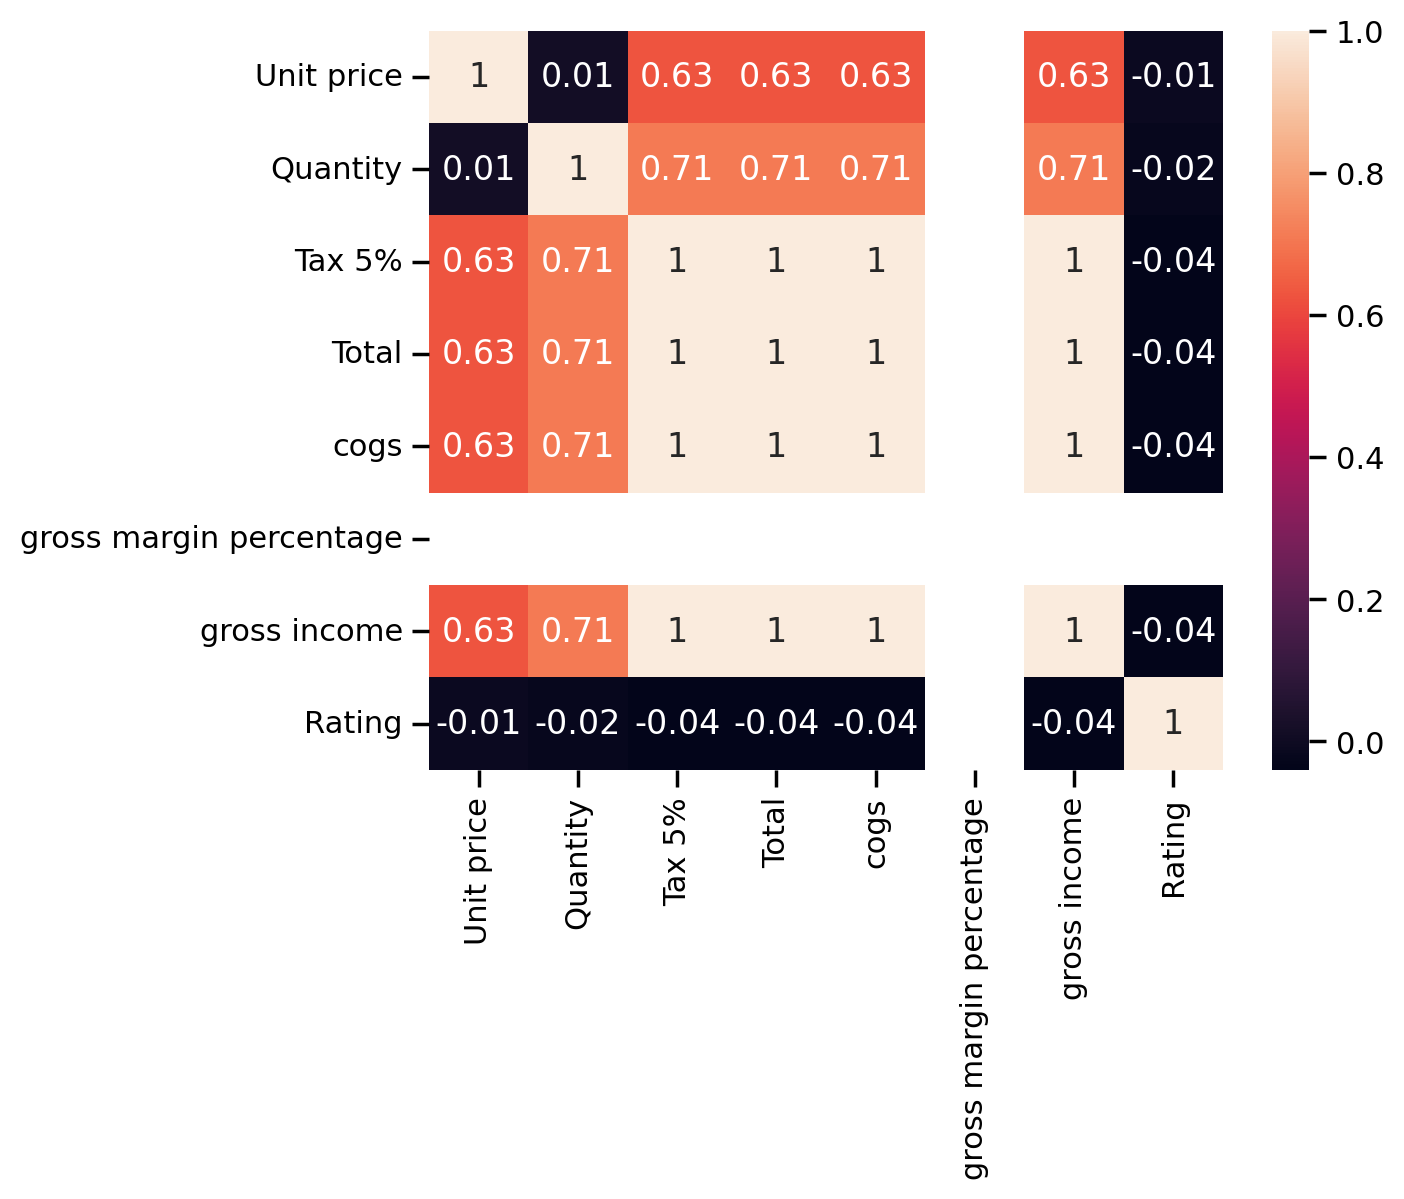

In [242]:
sns.heatmap(np.round(sales.corr(),2),annot=True)
plt.show()

From the heatmap, its clear the Tax 5%, Total, Gross Income and cogs (Cost of Goods Sold) are perfectly correlated.

Tax 5%, Total and cogs have a correlation of 0.71% with Quantity, this is pretty sizable.

Now that we idenitfied there correlations, we can plot these parameters and fit a regression line to the data. This can be done using Regplots.

# Regplot

This function plots data and computes a linear regression line  with the best fit. There are a number of mutually exclusive options for estimating the regression model.


<AxesSubplot:xlabel='cogs', ylabel='gross income'>

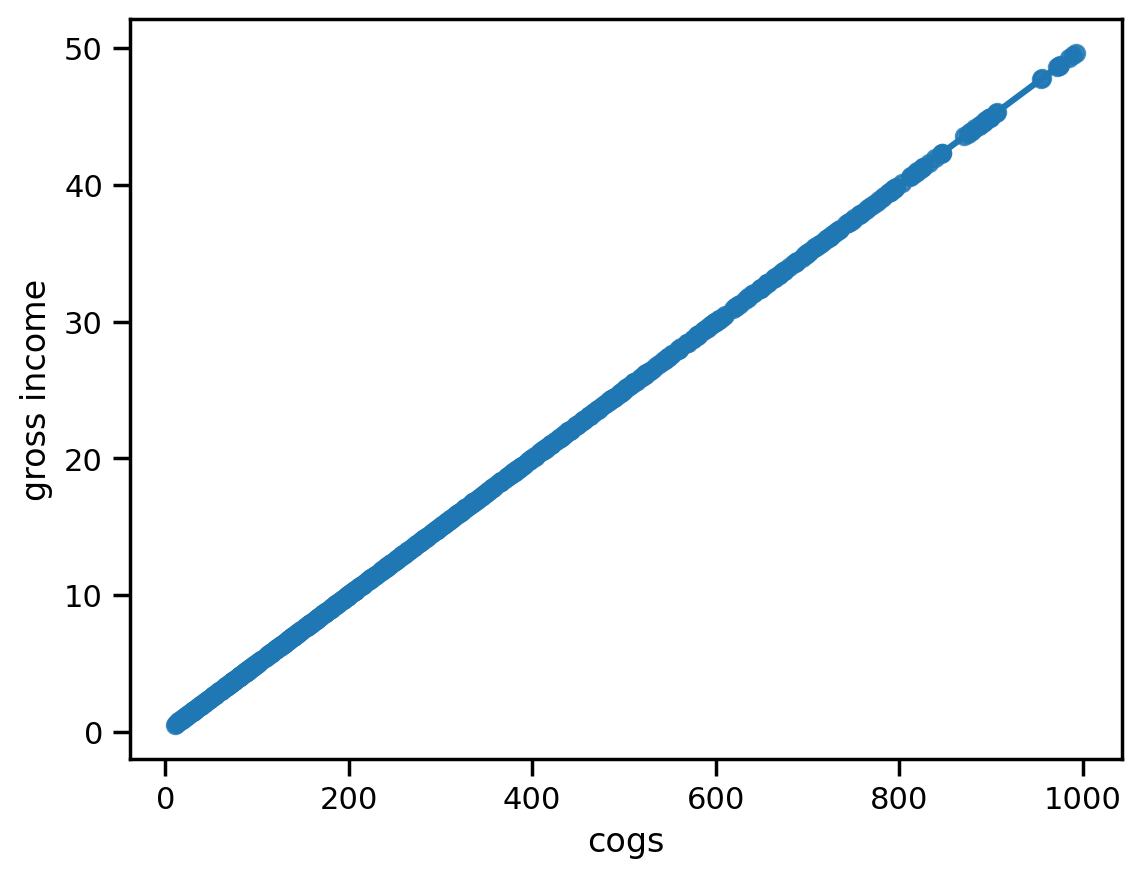

In [250]:
sns.regplot(x='cogs',y='gross income',data=sales)

<AxesSubplot:xlabel='Tax 5%', ylabel='gross income'>

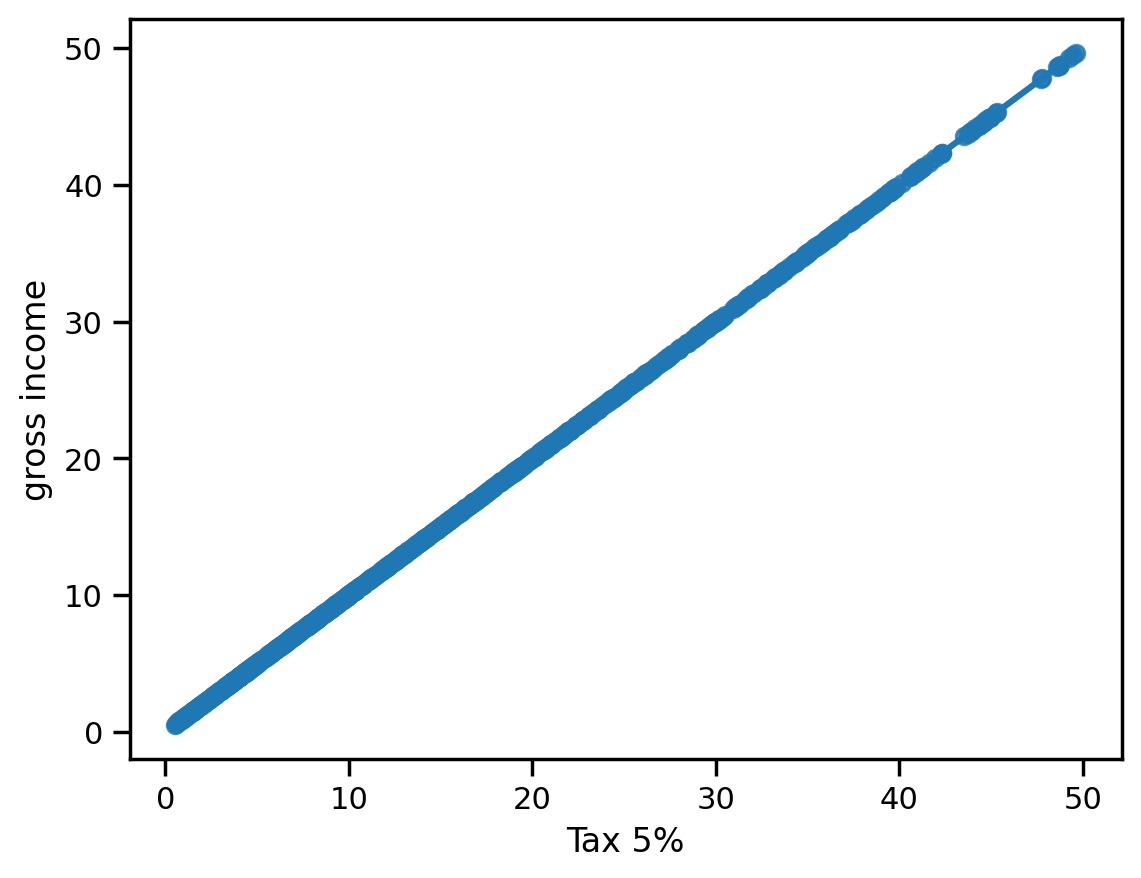

In [247]:
sns.regplot(x='Tax 5%',y='gross income',data=sales)

<AxesSubplot:xlabel='Quantity', ylabel='cogs'>

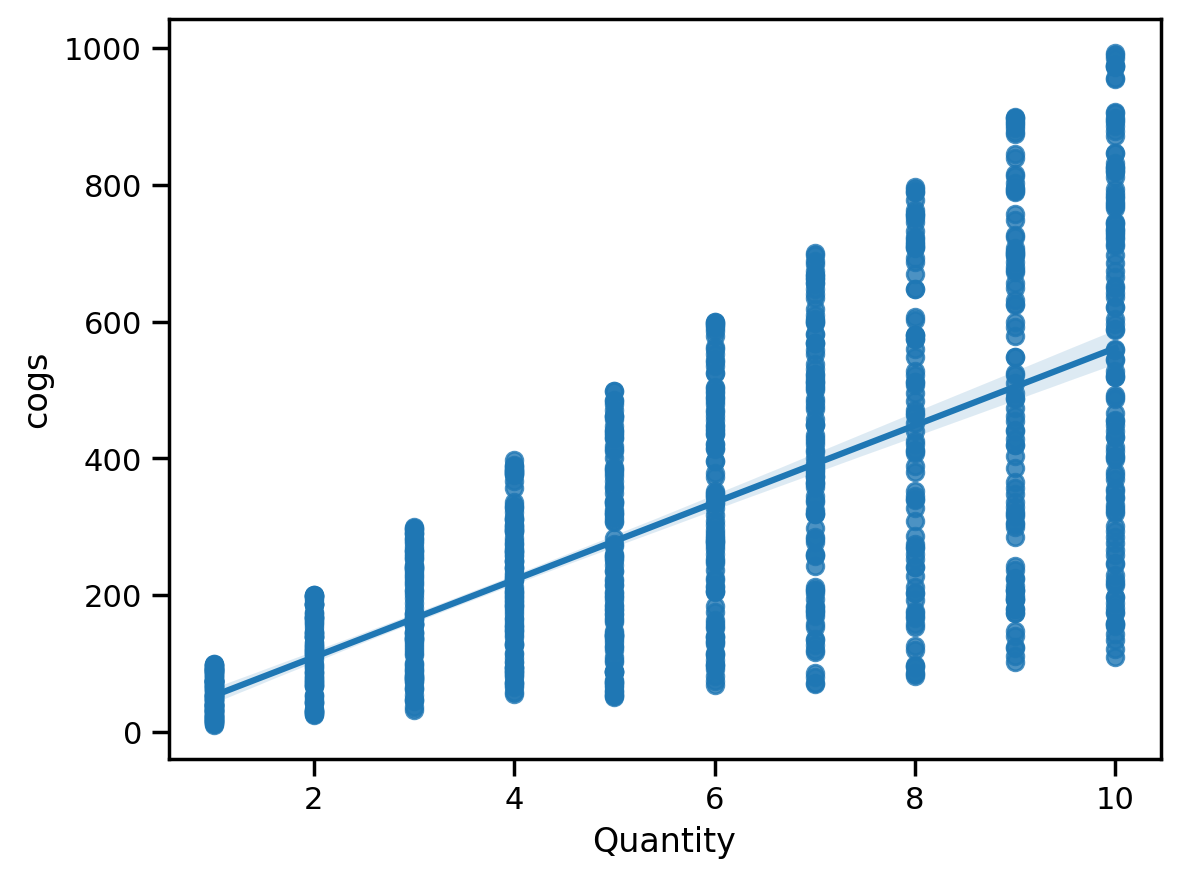

In [248]:
sns.regplot(x='Quantity',y='cogs',data=sales)

<AxesSubplot:xlabel='Unit price', ylabel='gross income'>

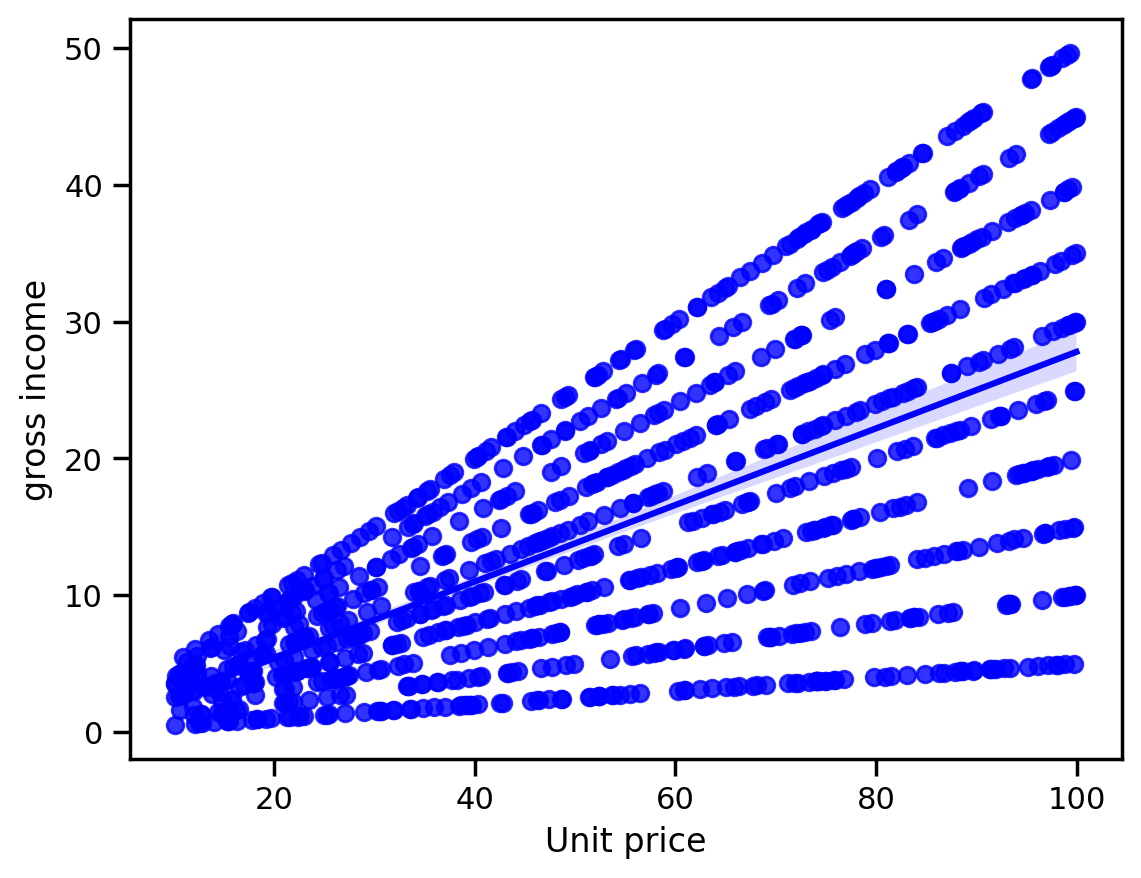

In [245]:
sns.regplot(x='Unit price',y='gross income',data=sales,color='blue')